In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

## Splitting image for a single image:

In [2]:
# image = cv2.imread("Training_3908.jpg")

In [3]:
# image_2d = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# plt.imshow(image_2d)

In [4]:
# left, right = image_2d.shape
# half = right//2

In [5]:
# lef_top=image_2d[:half, :half]
# right_top=image_2d[:half, half:]
# left_bottom=image_2d[half:,:half]
# right_bottom=image_2d[half:,half:]

In [6]:
# fig,ax = plt.subplots(2,2)
# ax[0,0].imshow(lef_top)
# ax[0,1].imshow(right_top)
# ax[1,0].imshow(left_bottom)
# ax[1,1].imshow(right_bottom)

In [7]:
# fig,ax = plt.subplots(4,2)
# ax[0,0].imshow(l_top[0])
# ax[0,1].imshow(r_top[0])
# ax[1,0].imshow(l_bottom[0])
# ax[1,1].imshow(r_bottom[0])
# ax[2,0].imshow(l_top[1])
# ax[2,1].imshow(r_top[1])
# ax[3,0].imshow(l_bottom[1])
# ax[3,1].imshow(r_bottom[1])
# plt.show()

## All the functions:

In [2]:
# 2D CONVERSION FUNCTION:

def convert_2d(img):
    image_2d = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return image_2d

In [3]:
# IMAGE GRADIENT FUNCTION:

def IG(img):
    sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    img_grad=np.sqrt(sobelX**2+sobelY**2)
    return img_grad

In [4]:
# THETA FUNCTION:

def theta(img):
    sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    slope = sobelY/sobelX
    slope1 = np.nan_to_num(slope, copy = True, nan = float('inf'))
    theta = np.arctan(slope1)
    return theta

In [5]:
# ANGLE INTERVAL CONVERSION FUNCTION:
def convert_angle_to_0_pi_interval(angle):
    new_angle = np.arctan2(np.sin(angle), np.cos(angle))
    if new_angle < 0:
        new_angle = abs(new_angle) + (np.pi - abs(new_angle))
    return new_angle

In [6]:
# FINAL THETA FUNCTION:

def final_theta(theta_arr):
    conv_theta = np.rad2deg([[[convert_angle_to_0_pi_interval(np.deg2rad(j)) for j in i] for i in a] for a in theta_arr])
    conv_theta[conv_theta == 180] = np.pi
    conv_theta = np.absolute(conv_theta)
    return conv_theta

In [7]:
# HISTOGRAM FUNCTION:

def histograms(grad,theta):
    hiss = np.zeros(16)
    theta = np.array(theta)
    theta = np.rad2deg(theta)
    thet = np.int32(theta/11.25)
    for i in range(grad.shape[0]):
        for j in range(grad.shape[1]):
            grd = grad[i][j]
            ind = thet[i][j]
            if ind == 16: 
                ind-= 1
            hiss[ind] += grd
    return hiss

In [8]:
# PLOTTING FUNCTION:

def plotting(hiss):
    label = ['{}-{}'.format(i,j) for i,j in zip(np.arange(0,181-11.25,11.25), np.arange(11.25,181,11.25))]
    plt.bar(label, height = hiss, width = 0.9)
    plt.xticks(rotation = 90)
    plt.xlabel("Theta")
    plt.ylabel("Image Gradient")
    plt.title('Bar plot')
    plt.show()


def plotting4(hiss):
    plt.figure(figsize=(16,10))
    label_lt = ['{}-{}lt'.format(i,j) for i,j in zip(np.arange(0,181-11.25,11.25), np.arange(11.25,181,11.25))]
    label_rt = ['{}-{}rt'.format(i,j) for i,j in zip(np.arange(0,181-11.25,11.25), np.arange(11.25,181,11.25))]
    label_lb = ['{}-{}lb'.format(i,j) for i,j in zip(np.arange(0,181-11.25,11.25), np.arange(11.25,181,11.25))]
    label_rb = ['{}-{}rb'.format(i,j) for i,j in zip(np.arange(0,181-11.25,11.25), np.arange(11.25,181,11.25))]
    label = label_lt+label_rt+label_lb+label_rb
    plt.bar(label, height = hiss, width = 0.9)
    plt.xticks(rotation = 90)
    plt.xlabel("Theta")
    plt.ylabel("Image Gradient")
    plt.title('Bar plot')
    plt.show()

In [9]:
def plotting_f(hiss):
    plt.figure(figsize=(16,10))
    label_lt = ['{}-{}lt'.format(i,j) for i,j in zip(np.arange(0,181-11.25,11.25), np.arange(11.25,181,11.25))]
    label_rt = ['{}-{}rt'.format(i,j) for i,j in zip(np.arange(0,181-11.25,11.25), np.arange(11.25,181,11.25))]
    label_lb = ['{}-{}lb'.format(i,j) for i,j in zip(np.arange(0,181-11.25,11.25), np.arange(11.25,181,11.25))]
    label_rb = ['{}-{}rb'.format(i,j) for i,j in zip(np.arange(0,181-11.25,11.25), np.arange(11.25,181,11.25))]
    label_gb = ['{}-{}gb'.format(i,j) for i,j in zip(np.arange(0,181-11.25,11.25), np.arange(11.25,181,11.25))]
    label = label_lt + label_rt + label_lb + label_rb + label_gb
    plt.bar(label, height = hiss, width = 0.9)
    plt.xticks(rotation = 90)
    plt.xlabel("Theta")
    plt.ylabel("Image Gradient")
    plt.title('Bar plot')
    plt.show()

## Making a dict of all the expressions:

In [10]:
train_exp_dict = {"Angry":[], "Disgust":[], "Fear":[], "Happy":[], "Neutral":[], "Sad":[], "Surprise":[]}
train_paths = ['train_angry', 'train_disgust', 'train_fear', 'train_happy', 'train_neutral', 'train_sad', 'train_surprise']
for (i,j) in zip(train_exp_dict.keys(),train_paths):
    train_exp_dict[i] = os.listdir(j)

In [11]:
test_exp_dict = {"Angry":[], "Disgust":[], "Fear":[], "Happy":[], "Neutral":[], "Sad":[], "Surprise":[]}
test_paths = ['test_angry', 'test_disgust', 'test_fear', 'test_happy', 'test_neutral', 'test_sad', 'test_surprise']
for (i,j) in zip(test_exp_dict.keys(),test_paths):
    test_exp_dict[i] = os.listdir(j)

### Angry:

In [12]:
train_full_list_angry = []
for img in train_exp_dict["Angry"]:
    img_arr = cv2.imread(os.path.join(train_paths[0], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    train_full_list_angry.append(img_arr)

In [13]:
test_full_list_angry = []
for img in test_exp_dict["Angry"]:
    img_arr = cv2.imread(os.path.join(test_paths[0], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    test_full_list_angry.append(img_arr)

### Disgust:

In [14]:
train_full_list_disgust = []
for img in train_exp_dict["Disgust"]:
    img_arr = cv2.imread(os.path.join(train_paths[1], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    train_full_list_disgust.append(img_arr)

In [15]:
test_full_list_disgust = []
for img in test_exp_dict["Disgust"]:
    img_arr = cv2.imread(os.path.join(test_paths[1], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    test_full_list_disgust.append(img_arr)

### Fear:

In [16]:
train_full_list_fear = []
for img in train_exp_dict["Fear"]:
    img_arr = cv2.imread(os.path.join(train_paths[2], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    train_full_list_fear.append(img_arr)

In [17]:
test_full_list_fear = []
for img in test_exp_dict["Fear"]:
    img_arr = cv2.imread(os.path.join(test_paths[2], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    test_full_list_fear.append(img_arr)

### Happy:

In [18]:
train_full_list_happy = []
for img in train_exp_dict["Happy"]:
    img_arr = cv2.imread(os.path.join(train_paths[3], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    train_full_list_happy.append(img_arr)

In [19]:
test_full_list_happy = []
for img in test_exp_dict["Happy"]:
    img_arr = cv2.imread(os.path.join(test_paths[3], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    test_full_list_happy.append(img_arr)

### Neutral:

In [20]:
train_full_list_neutral = []
for img in train_exp_dict["Neutral"]:
    img_arr = cv2.imread(os.path.join(train_paths[4], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    train_full_list_neutral.append(img_arr)

In [21]:
test_full_list_neutral = []
for img in test_exp_dict["Neutral"]:
    img_arr = cv2.imread(os.path.join(test_paths[4], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    test_full_list_neutral.append(img_arr)

### Sad:

In [22]:
train_full_list_sad = []
for img in train_exp_dict["Sad"]:
    img_arr = cv2.imread(os.path.join(train_paths[5], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    train_full_list_sad.append(img_arr)

In [23]:
test_full_list_sad = []
for img in test_exp_dict["Sad"]:
    img_arr = cv2.imread(os.path.join(test_paths[5], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    test_full_list_sad.append(img_arr)

### Surprise:

In [24]:
train_full_list_surprise = []
for img in train_exp_dict["Surprise"]:
    img_arr = cv2.imread(os.path.join(train_paths[6], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    train_full_list_surprise.append(img_arr)

In [25]:
test_full_list_surprise = []
for img in test_exp_dict["Surprise"]:
    img_arr = cv2.imread(os.path.join(test_paths[6], img))
#     img_arr = img_arr/255
#     plt.figure()
#     plt.imshow(img_arr)
    test_full_list_surprise.append(img_arr)

## Appending all the expressions in a single list for train and test:

In [26]:
l1 = [train_full_list_angry,train_full_list_disgust,train_full_list_fear,train_full_list_happy,
      train_full_list_neutral,train_full_list_sad,train_full_list_surprise]

l2 = [test_full_list_angry,test_full_list_disgust,test_full_list_fear,test_full_list_happy,
      test_full_list_neutral,test_full_list_sad,test_full_list_surprise]

In [27]:
lis = []
for i in l1:
    lis.extend(i)

lis1 = []
for i in l2:
    lis1.extend(i)

In [28]:
train_list = lis

test_list = lis1

In [29]:
train_list_upd = [convert_2d(i) for i in train_list]
test_list_upd = [convert_2d(i) for i in test_list]

In [30]:
train_list_upd[0].shape

(48, 48)

# GLOBAL:

In [32]:
# Image Gradient calculation (train data)
IG_train = [IG(i) for i in train_list_upd]

In [33]:
# Image Gradient calculation (test data)
IG_test = [IG(i) for i in test_list_upd]

In [34]:
# calculating theta (train)
theta_train=[theta(i) for i in train_list_upd]
final_theta_train = final_theta(theta_train)

<ipython-input-5-b6348c9701f0>:6: RuntimeWarning: divide by zero encountered in true_divide
  slope = sobelY/sobelX
<ipython-input-5-b6348c9701f0>:6: RuntimeWarning: invalid value encountered in true_divide
  slope = sobelY/sobelX


In [35]:
# calculating theta (test)
theta_test=[theta(i) for i in test_list_upd]
final_theta_test = final_theta(theta_test)

<ipython-input-5-b6348c9701f0>:6: RuntimeWarning: divide by zero encountered in true_divide
  slope = sobelY/sobelX
<ipython-input-5-b6348c9701f0>:6: RuntimeWarning: invalid value encountered in true_divide
  slope = sobelY/sobelX


In [36]:
# Histogram Calculation
hist_train = [histograms(item1,item2) for (item1, item2) in zip(IG_train, final_theta_train)]

In [37]:
# Histogram Calculation
hist_test = [histograms(item1,item2) for (item1, item2) in zip(IG_test, final_theta_test)]

In [38]:
label = 1
y_train = []
for i in l1:
    y_train.extend(np.repeat(label , len(i)))
    label += 1

label1 = 1
y_test = []
for i in l2:
    y_test.extend(np.repeat(label1 , len(i)))
    label1 += 1

In [39]:
X_train_global = hist_train
Y_train = y_train
X_test_global = hist_test
Y_test = y_test

In [40]:
hist_train1 = np.array(hist_train)
hist_train_norm = hist_train1/(hist_train1.sum())
hist_train_norm = np.absolute(hist_train_norm)

In [41]:
hist_test1 = np.array(hist_test)
hist_test_norm = hist_test1/(hist_test1.sum())
hist_test_norm = np.absolute(hist_test_norm)

In [42]:
X_train_global_norm = hist_train_norm
X_test_global_norm = hist_test_norm

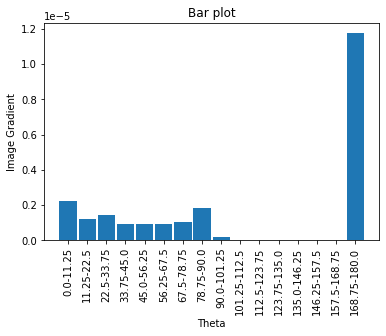

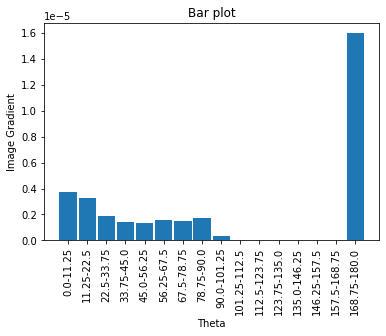

In [43]:
for i in hist_train_norm[0:2]:
    plotting(i)

## KNN:

### For simple histogram:

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
k =[KNeighborsClassifier(n_neighbors=i+1) for i in range(25)]

In [51]:
f_global = [i.fit(X_train_global, Y_train) for i in k]

In [273]:
s_global_train = [i.score(X_train_global,Y_train) for i in f_global]

           0
0   0.998084
1   0.647706
2   0.564248
3   0.524818
4   0.493608
5   0.465150
6   0.446341
7   0.432687
8   0.420530
9   0.407155
10  0.398203
11  0.391271
12  0.382876
13  0.379951
14  0.374865
15  0.371556
16  0.366993
17  0.362082
18  0.356334
19  0.352050
20  0.350935
21  0.349263
22  0.345188
23  0.342227
24  0.339406


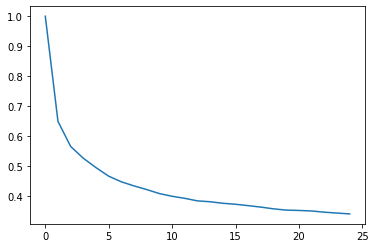

In [274]:
df_global_train = pd.DataFrame(s_global_train)
print(df_global_train)
plt.plot(df_global_train)
plt.show()

In [275]:
knn_accuracy_global_train = s_global_train[1]
### train_accuracy

In [52]:
s_global = [i.score(X_test_global,Y_test) for i in f_global]

           0
0   0.301337
1   0.259125
2   0.250348
3   0.257314
4   0.266927
5   0.267623
6   0.264558
7   0.263165
8   0.264001
9   0.258568
10  0.264837
11  0.260379
12  0.263583
13  0.264419
14  0.264976
15  0.266369
16  0.265673
17  0.263862
18  0.262469
19  0.261633
20  0.258707
21  0.256060
22  0.253831
23  0.252717
24  0.256339


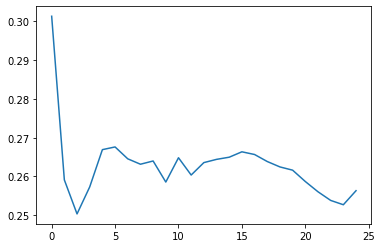

In [53]:
df_global = pd.DataFrame(s_global)
print(df_global)
plt.plot(df_global)
plt.show()

In [54]:
knn_accuracy_global = s_global[1]

In [55]:
y_pred_global = f_global[0].predict(X_test_global)
y_pred_global

array([4, 4, 6, ..., 6, 7, 4])

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
print(confusion_matrix(y_pred_global, Y_test))

[[258  14 123 255 178 149  66]
 [  5  42  15  16  14  10   9]
 [117  10 322 231 155 179  87]
 [208  15 202 550 323 293 120]
 [135  13 142 294 278 197  89]
 [150  12 142 265 188 324  71]
 [ 85   5  78 163  97  95 389]]


### For normalized histogram:

In [58]:
k =[KNeighborsClassifier(n_neighbors=i+1) for i in range(25)]

In [59]:
f_global_norm = [i.fit(X_train_global_norm, Y_train) for i in k]

In [277]:
s_global_norm_train = [i.score(X_train_global_norm,Y_train) for i in f_global_norm]

           0
0   0.998502
1   0.647706
2   0.564248
3   0.524818
4   0.493608
5   0.465150
6   0.446341
7   0.432687
8   0.420530
9   0.407155
10  0.398203
11  0.391271
12  0.382876
13  0.379951
14  0.374865
15  0.371556
16  0.366993
17  0.362082
18  0.356334
19  0.352050
20  0.350935
21  0.349263
22  0.345188
23  0.342227
24  0.339406


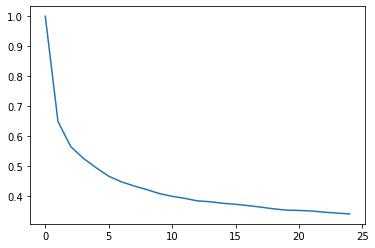

In [278]:
df_global_norm_train = pd.DataFrame(s_global_norm_train)
print(df_global_norm_train)
plt.plot(df_global_norm_train)
plt.show()

In [279]:
knn_accuracy_global_norm = s_global_norm_train[1]

In [60]:
s_global_norm = [i.score(X_test_global_norm,Y_test) for i in f_global_norm]

           0
0   0.149206
1   0.135135
2   0.141404
3   0.148509
4   0.132349
5   0.140290
6   0.128169
7   0.134439
8   0.132627
9   0.132488
10  0.135135
11  0.140847
12  0.136110
13  0.133463
14  0.135832
15  0.140011
16  0.135971
17  0.139315
18  0.142101
19  0.143773
20  0.142519
21  0.143355
22  0.143494
23  0.144051
24  0.144330


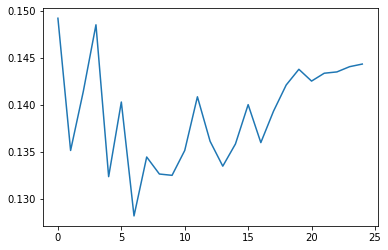

In [61]:
df_global_norm = pd.DataFrame(s_global_norm)
print(df_global_norm)
plt.plot(df_global_norm)
plt.show()

In [62]:
knn_accuracy_global_norm = s_global_norm[3]
print(knn_accuracy_global_norm)

0.1485093340763444


In [63]:
y_pred_global_norm = f_global_norm[0].predict(X_test_global_norm)
y_pred_global_norm

array([6, 6, 1, ..., 6, 6, 6])

In [64]:
print(confusion_matrix(y_pred_global_norm, Y_test))

[[ 204   22  222  399  310  279  192]
 [   0    0    0    1    0    1    0]
 [  95   12   86  225  138  195   68]
 [  10    0   11   11    8   12    5]
 [   8    0    2    2    9    8    0]
 [ 609   74  658 1071  716  693  498]
 [  32    3   45   65   52   59   68]]


## SVM:

### For simple histogram:

In [65]:
from sklearn.svm import SVC

### Sigmoid kernel:

In [287]:
classifier_sigmoid_global = SVC(kernel='sigmoid', random_state = 0)
classifier_sigmoid_global.fit(X_train_global,Y_train)

SVC(kernel='sigmoid', random_state=0)

In [288]:
sigmoid_pred_global_train = classifier_sigmoid_global.predict(X_train_global)

In [289]:
cm1_global_train = confusion_matrix(Y_train,sigmoid_pred_global_train)
accuracy_sigmoid_global_train = float(cm1_global_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with sigmoid kernel for train data : ", accuracy_sigmoid_global_train)


Accuracy Of SVM with sigmoid kernel for train data :  0.18826848723396844


In [285]:
sigmoid_pred_global = classifier_sigmoid_global.predict(X_test_global)

In [286]:
cm1_global = confusion_matrix(Y_test,sigmoid_pred_global)
accuracy_sigmoid_global = float(cm1_global.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with sigmoid kernel : ", accuracy_sigmoid_global)


Accuracy Of SVM with sigmoid kernel :  0.1918361660629702


### Polynomial kernel (with degree 1) :

In [69]:
classifier_pol_1_global = SVC(kernel='poly', degree = 1, random_state = 0)
classifier_pol_1_global.fit(X_train_global,Y_train)

SVC(degree=1, kernel='poly', random_state=0)

In [290]:
pol_1_pred_global_train = classifier_pol_1_global.predict(X_train_global)

In [294]:
cm2_global_train = confusion_matrix(Y_train,pol_1_pred_global_train)
accuracy_pol_1_global_train = float(cm2_global_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 for train data : ", accuracy_pol_1_global_train)


Accuracy Of SVM with polynomial kernel having deg 1 for train data :  0.2513149186666202


In [70]:
pol_1_pred_global = classifier_pol_1_global.predict(X_test_global)

In [71]:
cm2_global = confusion_matrix(Y_test,pol_1_pred_global)
accuracy_pol_1_global = float(cm2_global.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 : ", accuracy_pol_1_global)


Accuracy Of SVM with polynomial kernel having deg 1 :  0.24714405126776262


### Polynomial kernel (with degree 3):

In [72]:
classifier_pol_3_global = SVC(kernel='poly', degree = 3, random_state = 0)
classifier_pol_3_global.fit(X_train_global,Y_train)

SVC(kernel='poly', random_state=0)

In [295]:
pol_3_pred_global_train = classifier_pol_3_global.predict(X_train_global)

In [297]:
cm3_global_train = confusion_matrix(Y_train,pol_3_pred_global_train)
accuracy_pol_3_global_train = float(cm3_global_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 for train data : ", accuracy_pol_3_global_train)


Accuracy Of SVM with polynomial kernel having deg 3 for train data :  0.25754989724476646


In [298]:
pol_3_pred_global = classifier_pol_3_global.predict(X_test_global)

In [299]:
cm3_global = confusion_matrix(Y_test,pol_3_pred_global)
accuracy_pol_3_global = float(cm3_global.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 : ", accuracy_pol_3_global)


Accuracy Of SVM with polynomial kernel having deg 3 :  0.2539704653106715


### Linear kernel:

In [75]:
# classifier_linear = SVC(kernel='linear', random_state = 0)
# classifier_linear.fit(X_train,Y_train)

### RBF kernel:

In [76]:
classifier_rbf_global = SVC(kernel='rbf', random_state = 0)
classifier_rbf_global.fit(X_train_global,Y_train)

SVC(random_state=0)

In [300]:
rbf_pred_global_train = classifier_rbf_global.predict(X_train_global)

In [304]:
cm4_global_train = confusion_matrix(Y_train,rbf_pred_global_train)
accuracy_rbf_global_train = float(cm4_global_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with rbf kernel for train data : ", accuracy_rbf_global_train)


Accuracy Of SVM with rbf kernel for train data :  0.26016231843672716


In [305]:
rbf_pred_global = classifier_rbf_global.predict(X_test_global)

In [306]:
cm4_global = confusion_matrix(Y_test,rbf_pred_global)
accuracy_rbf_global = float(cm4_global.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with rbf kernel : ", accuracy_rbf_global)


Accuracy Of SVM with rbf kernel :  0.2559208693229312


In [415]:
df_svm_global_train = pd.DataFrame([accuracy_sigmoid_global_train, accuracy_pol_1_global_train, accuracy_pol_3_global_train, accuracy_rbf_global_train],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_global_train

,Accuracy
sigmoid,0.188268
pol_1,0.251315
pol_3,0.257550
rbf,0.260162


In [79]:
df_svm_global = pd.DataFrame([accuracy_sigmoid_global, accuracy_pol_1_global, accuracy_pol_3_global, accuracy_rbf_global],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_global

,Accuracy
sigmoid,0.191836
pol_1,0.247144
pol_3,0.253970
rbf,0.255921


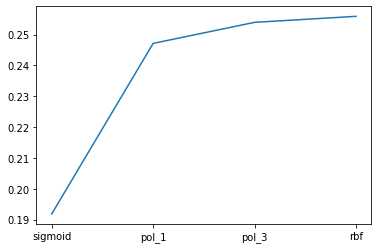

In [80]:
plt.plot(df_svm_global)

### For normalized histogram:

### Sigmoid kernel:

In [81]:
classifier_sigmoid_global_norm = SVC(kernel='sigmoid', random_state = 0)
classifier_sigmoid_global_norm.fit(X_train_global_norm,Y_train)

SVC(kernel='sigmoid', random_state=0)

In [309]:
sigmoid_pred_global_norm_train = classifier_sigmoid_global_norm.predict(X_train_global_norm)

In [310]:
cm1_global_norm_train = confusion_matrix(Y_train,sigmoid_pred_global_norm_train)
accuracy_sigmoid_global_norm_train = float(cm1_global_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with sigmoid kernel for train data : ", accuracy_sigmoid_global_norm_train)


Accuracy Of SVM with sigmoid kernel :  0.18826848723396844


In [311]:
sigmoid_pred_global_norm = classifier_sigmoid_global_norm.predict(X_test_global_norm)

In [312]:
cm1_global_norm = confusion_matrix(Y_test,sigmoid_pred_global_norm)
accuracy_sigmoid_global_norm = float(cm1_global_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with sigmoid kernel : ", accuracy_sigmoid_global_norm)


Accuracy Of SVM with sigmoid kernel :  0.1337419894120925


### Polynomial kernel (with degree 1) :

In [84]:
classifier_pol_1_global_norm = SVC(kernel='poly', degree = 1, random_state = 0)
classifier_pol_1_global_norm.fit(X_train_global_norm,Y_train)

SVC(degree=1, kernel='poly', random_state=0)

In [313]:
pol_1_pred_global_norm_train = classifier_pol_1_global_norm.predict(X_train_global_norm)

In [314]:
cm2_global_norm_train = confusion_matrix(Y_train,pol_1_pred_global_norm_train)
accuracy_pol_1_global_norm_train = float(cm2_global_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 for train data : ", accuracy_pol_1_global_norm_train)


Accuracy Of SVM with polynomial kernel having deg 1 for train data :  0.2513149186666202


In [315]:
pol_1_pred_global_norm = classifier_pol_1_global_norm.predict(X_test_global_norm)

In [316]:
cm2_global_norm = confusion_matrix(Y_test,pol_1_pred_global_norm)
accuracy_pol_1_global_norm = float(cm2_global_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 : ", accuracy_pol_1_global_norm)


Accuracy Of SVM with polynomial kernel having deg 1 :  0.24714405126776262


### Polynomial kernel (with degree 3):

In [87]:
classifier_pol_3_global_norm = SVC(kernel='poly', degree = 3, random_state = 0)
classifier_pol_3_global_norm.fit(X_train_global_norm,Y_train)

SVC(kernel='poly', random_state=0)

In [317]:
pol_3_pred_global_norm_train = classifier_pol_3_global_norm.predict(X_train_global_norm)

In [411]:
cm3_global_norm_train = confusion_matrix(Y_train,pol_3_pred_global_norm_train)
accuracy_pol_3_global_norm_train = float(cm3_global_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 for train data: ", accuracy_pol_3_global_norm_train)


Accuracy Of SVM with polynomial kernel having deg 3 for train data:  0.25754989724476646


In [319]:
pol_3_pred_global_norm = classifier_pol_3_global_norm.predict(X_test_global_norm)

In [320]:
cm3_global_norm = confusion_matrix(Y_test,pol_3_pred_global_norm)
accuracy_pol_3_global_norm = float(cm3_global_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 : ", accuracy_pol_3_global_norm)


Accuracy Of SVM with polynomial kernel having deg 3 :  0.1861242685984954


### Linear kernel:

In [90]:
# classifier_linear = SVC(kernel='linear', random_state = 0)
# classifier_linear.fit(X_train,Y_train)

### RBF kernel:

In [91]:
classifier_rbf_global_norm = SVC(kernel='rbf', random_state = 0)
classifier_rbf_global_norm.fit(X_train_global_norm,Y_train)

SVC(random_state=0)

In [321]:
rbf_pred_global_norm_train = classifier_rbf_global_norm.predict(X_train_global_norm)

In [410]:
cm4_global_norm_train = confusion_matrix(Y_train,rbf_pred_global_norm_train)
accuracy_rbf_global_norm_train = float(cm4_global_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with rbf kernel for train data: ", accuracy_rbf_global_norm_train)


Accuracy Of SVM with rbf kernel for train data:  0.26016231843672716


In [323]:
rbf_pred_global_norm = classifier_rbf_global_norm.predict(X_test_global_norm)

In [324]:
cm4_global_norm = confusion_matrix(Y_test,rbf_pred_global_norm)
accuracy_rbf_global_norm = float(cm4_global_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with rbf kernel : ", accuracy_rbf_global_norm)


Accuracy Of SVM with rbf kernel :  0.1586792978545556


In [414]:
df_svm_global_norm_train = pd.DataFrame([accuracy_sigmoid_global_norm_train, accuracy_pol_1_global_norm_train, accuracy_pol_3_global_norm_train, accuracy_rbf_global_norm_train],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_global_norm_train

,Accuracy
sigmoid,0.188268
pol_1,0.251315
pol_3,0.257550
rbf,0.260162


In [94]:
df_svm_global_norm = pd.DataFrame([accuracy_sigmoid_global_norm, accuracy_pol_1_global_norm, accuracy_pol_3_global_norm, accuracy_rbf_global_norm],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_global_norm

,Accuracy
sigmoid,0.133742
pol_1,0.247144
pol_3,0.186124
rbf,0.158679


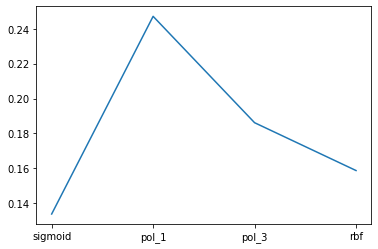

In [95]:
plt.plot(df_svm_global_norm)

## Logistic Regression:

### For simple histogram:

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
model_global = LogisticRegression(solver='newton-cg', random_state=0)
model_global.fit(X_train_global, Y_train)

/home/aravind_sundarraj0112/.local/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/aravind_sundarraj0112/.local/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/aravind_sundarraj0112/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(random_state=0, solver='newton-cg')

In [325]:
y_log_pred_global_train = model_global.predict(X_train_global)
pd.value_counts(y_log_pred_global_train)

4    25927
7     1868
5      708
3      128
1       63
6       15
dtype: int64

In [326]:
logistic_acc_global_train = model_global.score(X_train_global, Y_train)
logistic_acc_global_train

0.2607196349576788

In [327]:
y_log_pred_global = model_global.predict(X_test_global)
pd.value_counts(y_log_pred_global)

4    6511
7     433
5     178
3      36
1      16
6       4
dtype: int64

In [328]:
logistic_acc_global = model_global.score(X_test_global, Y_test)
logistic_acc_global

0.25745332961827805

### For normalized histogram:

In [100]:
model_global_norm = LogisticRegression(solver='newton-cg', random_state=0)
model_global_norm.fit(X_train_global_norm, Y_train)

LogisticRegression(random_state=0, solver='newton-cg')

In [329]:
y_log_pred_global_norm_train = model_global_norm.predict(X_train_global_norm)
pd.value_counts(y_log_pred_global_norm_train)

4    28709
dtype: int64

In [330]:
logistic_acc_global_norm_train = model_global_norm.score(X_train_global_norm, Y_train)
logistic_acc_global_norm_train

0.2513149186666202

In [101]:
y_log_pred_global_norm = model_global_norm.predict(X_test_global_norm)
pd.value_counts(y_log_pred_global_norm)

4    7178
dtype: int64

In [102]:
logistic_acc_global_norm = model_global_norm.score(X_test_global_norm, Y_test)
logistic_acc_global_norm

0.24714405126776262

## Decision tree:

### For simple histogram:

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [104]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      

In [105]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  

In [106]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    metrics.accuracy_score(y_test,y_pred)*100)

In [107]:
clf_gini_global = train_using_gini(X_train_global, X_test_global, Y_train)
clf_entropy_global = tarin_using_entropy(X_train_global, X_test_global, Y_train)

In [331]:
y_pred_gini_global_train = prediction(X_train_global, clf_gini_global)
dt_gini_accuracy_global_train = cal_accuracy(Y_train, y_pred_gini_global_train)
dt_gini_accuracy_global_train

Predicted values:
[4 4 4 ... 4 4 4]
Confusion Matrix:  [[   0    0  276 3196  223    0  300]
 [   0    0   10  339   43    0   44]
 [   0    0  309 3024  204    0  560]
 [   0    0  251 6126  307    0  531]
 [   0    0  190 4081  338    0  356]
 [   0    0  193 3942  312    0  383]
 [   0    0  225 2072  118    0  756]]
Accuracy :  26.225225539029573


In [333]:
y_pred_entropy_global_train = prediction(X_train_global, clf_entropy_global)
dt_entropy_accuracy_global_train = cal_accuracy(Y_train, y_pred_entropy_global_train)
dt_entropy_accuracy_global_train

Predicted values:
[4 4 4 ... 4 4 4]
Confusion Matrix:  [[   0    0  276 3336   83    0  300]
 [   0    0   10  366   16    0   44]
 [   0    0  309 3116  112    0  560]
 [   0    0  251 6297  136    0  531]
 [   0    0  190 4252  167    0  356]
 [   0    0  193 4131  123    0  383]
 [   0    0  225 2121   69    0  756]]
Accuracy :  26.225225539029573


In [332]:
y_pred_gini_global = prediction(X_test_global, clf_gini_global)
dt_gini_accuracy_global = cal_accuracy(Y_test, y_pred_gini_global)
dt_gini_accuracy_global

Predicted values:
[4 4 7 ... 4 7 4]
Confusion Matrix:  [[   0    0   68  759   61    0   70]
 [   0    0    2   79   13    0   17]
 [   0    0   73  762   55    0  134]
 [   0    0   70 1497   85    0  122]
 [   0    0   46 1014   88    0   85]
 [   0    0   44 1038   85    0   80]
 [   0    0   51  558   28    0  194]]
Accuracy :  25.801058790749515


In [334]:
y_pred_entropy_global = prediction(X_test_global, clf_entropy_global)
dt_entropy_accuracy_global = cal_accuracy(Y_test, y_pred_entropy_global)
dt_entropy_accuracy_global

Predicted values:
[4 4 7 ... 4 7 4]
Confusion Matrix:  [[   0    0   68  800   20    0   70]
 [   0    0    2   91    1    0   17]
 [   0    0   73  789   28    0  134]
 [   0    0   70 1539   43    0  122]
 [   0    0   46 1058   44    0   85]
 [   0    0   44 1093   30    0   80]
 [   0    0   51  568   18    0  194]]
Accuracy :  25.773195876288657


### For normalized histogram:

In [110]:
clf_gini_global_norm = train_using_gini(X_train_global_norm, X_test_global_norm, Y_train)
clf_entropy_global_norm = tarin_using_entropy(X_train_global_norm, X_test_global_norm, Y_train)

In [335]:
y_pred_gini_global_norm_train = prediction(X_train_global_norm, clf_gini_global_norm)
dt_gini_accuracy_global_norm_train = cal_accuracy(Y_train, y_pred_gini_global_norm_train)
dt_gini_accuracy_global_norm_train

Predicted values:
[4 4 4 ... 4 4 4]
Confusion Matrix:  [[   6    0    4 3984    1    0    0]
 [   0    0    0  436    0    0    0]
 [   1    0   28 4062    0    6    0]
 [   0    0    2 7209    0    4    0]
 [   0    0    7 4948   10    0    0]
 [   0    0    9 4810    3    8    0]
 [   0    0    1 3166    0    4    0]]
Accuracy :  25.291720366435612


In [336]:
y_pred_entropy_global_norm_train = prediction(X_train_global_norm, clf_entropy_global_norm)
dt_entropy_accuracy_global_norm_train = cal_accuracy(Y_train, y_pred_entropy_global_norm_train)
dt_entropy_accuracy_global_norm_train

Predicted values:
[4 4 4 ... 4 4 4]
Confusion Matrix:  [[   6    0    1 3986    2    0    0]
 [   0    0    0  435    1    0    0]
 [   0    0   28 4064    5    0    0]
 [   0    0    1 7208    3    3    0]
 [   0    0    0 4947   18    0    0]
 [   0    0   10 4807    9    4    0]
 [   0    0    4 3167    0    0    0]]
Accuracy :  25.302170051203454


In [337]:
y_pred_gini_global_norm = prediction(X_test_global_norm, clf_gini_global_norm)
dt_gini_accuracy_global_norm = cal_accuracy(Y_test, y_pred_gini_global_norm)
dt_gini_accuracy_global_norm

Predicted values:
[4 4 4 ... 4 4 4]
Confusion Matrix:  [[   3    0   10  796    0  149    0]
 [   0    0    6   80    0   25    0]
 [   2    0   18  857    0  147    0]
 [   8    0   26 1407    0  333    0]
 [   4    0   21  965    0  243    0]
 [   5    0   41  911    0  290    0]
 [   1    0   11  747    0   72    0]]
Accuracy :  23.93424352187239


In [338]:
y_pred_entropy_global_norm = prediction(X_test_global_norm, clf_entropy_global_norm)
dt_entropy_accuracy_global_norm = cal_accuracy(Y_test, y_pred_entropy_global_norm)
dt_entropy_accuracy_global_norm

Predicted values:
[4 4 4 ... 4 4 4]
Confusion Matrix:  [[   3    0  149  797    1    8    0]
 [   0    0   29   80    0    2    0]
 [   2    0  154  857    1   10    0]
 [   6    0  348 1406    7    7    0]
 [   3    0  241  972    3   14    0]
 [   5    0  303  915   16    8    0]
 [   1    0   77  747    2    4    0]]
Accuracy :  21.928113680691


## Random Forest:

### For simple histogram:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create a Gaussian Classifier
clf_global = RandomForestClassifier(n_estimators=500)

clf_global.fit(X_train_global,Y_train)

y_pred_rf_global = clf_global.predict(X_test_global)

rf_accuracy_global = metrics.accuracy_score(Y_test, y_pred_rf_global)
print("Accuracy:", rf_accuracy_global)

### For 200 values of estimators:

Text(0, 0.5, 'Training Accuracy')

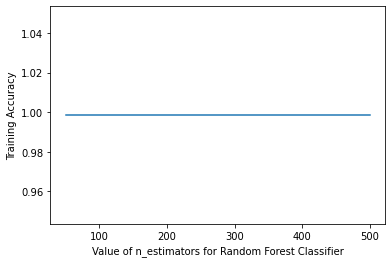

In [423]:
rf_gb_est = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_global_train =[]
for k in rf_gb_est:
    rfc_global = RandomForestClassifier(n_estimators=k)
    rfc_global.fit(X_train_global, Y_train)
    y_pred_rf_global = rfc_global.predict(X_train_global)
    accuracies_global_train.append(metrics.accuracy_score(Y_train, y_pred_rf_global))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_global_train)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Training Accuracy')

In [424]:
rf_accuracy_global_train = max(accuracies_global_train)
rf_accuracy_global_train

0.9985022118499425

Text(0, 0.5, 'Testing Accuracy')

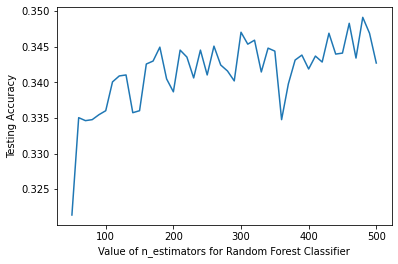

In [114]:
rf_gb_est = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_global =[]
for k in rf_gb_est:
    rfc_global = RandomForestClassifier(n_estimators=k)
    rfc_global.fit(X_train_global, Y_train)
    y_pred_rf_global = rfc_global.predict(X_test_global)
    accuracies_global.append(metrics.accuracy_score(Y_test, y_pred_rf_global))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_global)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [115]:
rf_accuracy_global = max(accuracies_global)
rf_accuracy_global

0.34912231819448314

### For normalized histogram:

In [116]:
#Create a Gaussian Classifier
clf_global_norm = RandomForestClassifier(n_estimators=500)

clf_global_norm.fit(X_train_global_norm,Y_train)

y_pred_rf_global_norm = clf_global_norm.predict(X_test_global_norm)

rf_accuracy_global_norm = metrics.accuracy_score(Y_test, y_pred_rf_global_norm)
print("Accuracy:", rf_accuracy_global_norm)

Accuracy: 0.1337419894120925


### For 200 values of estimators:

Text(0, 0.5, 'Training Accuracy')

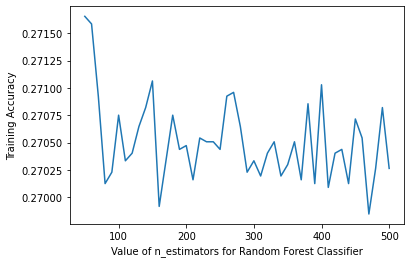

In [427]:
rf_gb_est_norm = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_global_norm_train =[]
for k in rf_gb_est_norm:
    rfc_global_norm = RandomForestClassifier(n_estimators=k)
    rfc_global_norm.fit(X_train_global_norm, Y_train)
    y_pred_rf_global_norm = rfc_global_norm.predict(X_train_global_norm)
    accuracies_global_norm_train.append(metrics.accuracy_score(Y_train, y_pred_rf_global_norm))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_global_norm_train)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Training Accuracy')

In [428]:
rf_accuracy_global_norm_train = max(accuracies_global_norm_train)
rf_accuracy_global_norm_train

0.2716569716813543

Text(0, 0.5, 'Testing Accuracy')

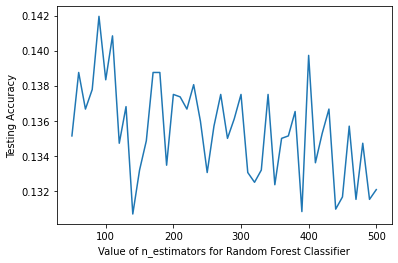

In [429]:
rf_gb_est_norm = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_global_norm =[]
for k in rf_gb_est_norm:
    rfc_global_norm = RandomForestClassifier(n_estimators=k)
    rfc_global_norm.fit(X_train_global_norm, Y_train)
    y_pred_rf_global_norm = rfc_global_norm.predict(X_test_global_norm)
    accuracies_global_norm.append(metrics.accuracy_score(Y_test, y_pred_rf_global_norm))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_global_norm)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [430]:
rf_accuracy_global_norm = max(accuracies_global_norm)
rf_accuracy_global_norm

0.14196154917804402

# LOCAL:

### Splitting all the images in 4 parts for train and test:

In [44]:
left, right = train_list_upd[0].shape
half = right//2

In [45]:
train_l_top,train_r_top,train_l_bottom,train_r_bottom=[],[],[],[]
for i in train_list_upd:
    lef_top=i[:half, :half]
    right_top=i[:half, half:]
    left_bottom=i[half:,:half]
    right_bottom=i[half:,half:]
    train_l_top.append(lef_top)
    train_r_top.append(right_top)
    train_l_bottom.append(left_bottom)
    train_r_bottom.append(right_bottom)

In [46]:
test_l_top,test_r_top,test_l_bottom,test_r_bottom=[],[],[],[]
for i in test_list_upd:
    lef_top=i[:half, :half]
    right_top=i[:half, half:]
    left_bottom=i[half:,:half]
    right_bottom=i[half:,half:]
    test_l_top.append(lef_top)
    test_r_top.append(right_top)
    test_l_bottom.append(left_bottom)
    test_r_bottom.append(right_bottom)

### Image gradient calculation for all the parts:

In [47]:
# Image Gradient calculation (train data)
IG_train_l_top = [IG(i) for i in train_l_top]
IG_train_r_top = [IG(i) for i in train_r_top]
IG_train_l_bottom = [IG(i) for i in train_l_bottom]
IG_train_r_bottom = [IG(i) for i in train_r_bottom]

In [48]:
# Image Gradient calculation (test data)
IG_test_l_top = [IG(i) for i in test_l_top]
IG_test_r_top = [IG(i) for i in test_r_top]
IG_test_l_bottom = [IG(i) for i in test_l_bottom]
IG_test_r_bottom = [IG(i) for i in test_r_bottom]

### Theta calculation for all the parts:

In [49]:
# calculating theta (train)

theta_train_l_top = [theta(i) for i in train_l_top]
final_theta_train_l_top = final_theta(theta_train_l_top)

theta_train_r_top = [theta(i) for i in train_r_top]
final_theta_train_r_top = final_theta(theta_train_r_top)

theta_train_l_bottom = [theta(i) for i in train_l_bottom]
final_theta_train_l_bottom = final_theta(theta_train_l_bottom)

theta_train_r_bottom = [theta(i) for i in train_r_bottom]
final_theta_train_r_bottom = final_theta(theta_train_r_bottom)

<ipython-input-5-b6348c9701f0>:6: RuntimeWarning: divide by zero encountered in true_divide
  slope = sobelY/sobelX
<ipython-input-5-b6348c9701f0>:6: RuntimeWarning: invalid value encountered in true_divide
  slope = sobelY/sobelX


In [50]:
# calculating theta (test)

theta_test_l_top = [theta(i) for i in test_l_top]
final_theta_test_l_top = final_theta(theta_test_l_top)

theta_test_r_top = [theta(i) for i in test_r_top]
final_theta_test_r_top = final_theta(theta_test_r_top)

theta_test_l_bottom = [theta(i) for i in test_l_bottom]
final_theta_test_l_bottom = final_theta(theta_test_l_bottom)

theta_test_r_bottom = [theta(i) for i in test_r_bottom]
final_theta_test_r_bottom = final_theta(theta_test_r_bottom)

<ipython-input-5-b6348c9701f0>:6: RuntimeWarning: divide by zero encountered in true_divide
  slope = sobelY/sobelX
<ipython-input-5-b6348c9701f0>:6: RuntimeWarning: invalid value encountered in true_divide
  slope = sobelY/sobelX


### Histogram Calculation for all the parts:

In [51]:
# Histogram Calculation (train)

hist_train_l_top = [histograms(item1,item2) for (item1, item2) in zip(IG_train_l_top, final_theta_train_l_top)]
hist_train_r_top = [histograms(item1,item2) for (item1, item2) in zip(IG_train_r_top, final_theta_train_r_top)]
hist_train_l_bottom = [histograms(item1,item2) for (item1, item2) in zip(IG_train_l_bottom, final_theta_train_l_bottom)]
hist_train_r_bottom = [histograms(item1,item2) for (item1, item2) in zip(IG_train_r_bottom, final_theta_train_r_bottom)]

In [52]:
# Histogram Calculation (test)

hist_test_l_top = [histograms(item1,item2) for (item1, item2) in zip(IG_test_l_top, final_theta_test_l_top)]
hist_test_r_top = [histograms(item1,item2) for (item1, item2) in zip(IG_test_r_top, final_theta_test_r_top)]
hist_test_l_bottom = [histograms(item1,item2) for (item1, item2) in zip(IG_test_l_bottom, final_theta_test_l_bottom)]
hist_test_r_bottom = [histograms(item1,item2) for (item1, item2) in zip(IG_test_r_bottom, final_theta_test_r_bottom)]

### Concatenating all the histograms:

In [53]:
hist_train_concat = [np.hstack((hist_train_l_top[i],hist_train_r_top[i],hist_train_l_bottom[i],hist_train_r_bottom[i])) for i in range(len(hist_train_l_top))]

In [54]:
hist_test_concat = [np.hstack((hist_test_l_top[i],hist_test_r_top[i],hist_test_l_bottom[i],hist_test_r_bottom[i])) for i in range(len(hist_test_l_top))]

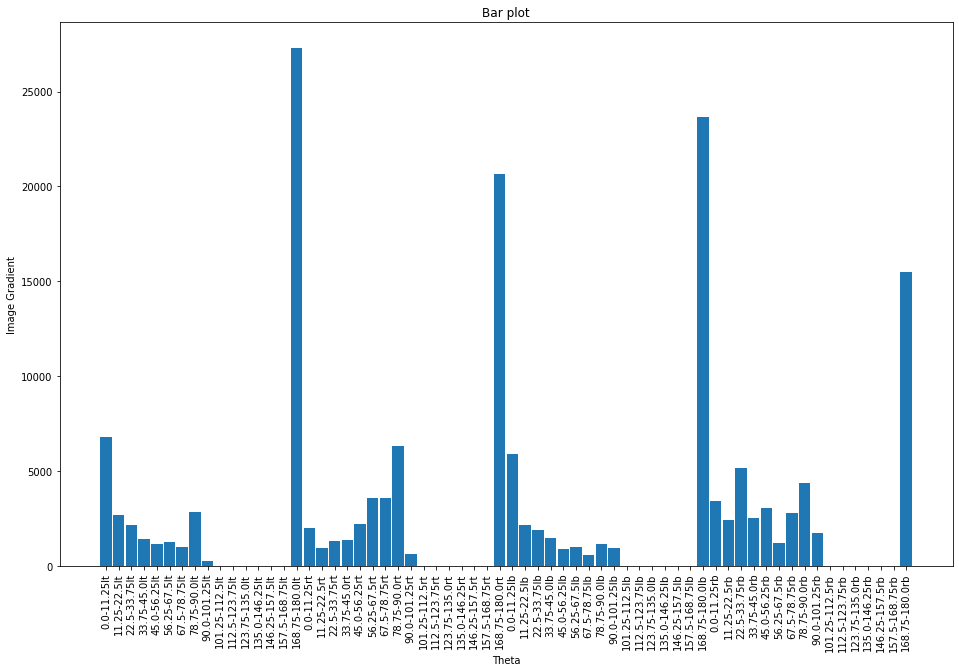

In [55]:
for i in hist_train_concat:
    plotting4(i)
    break

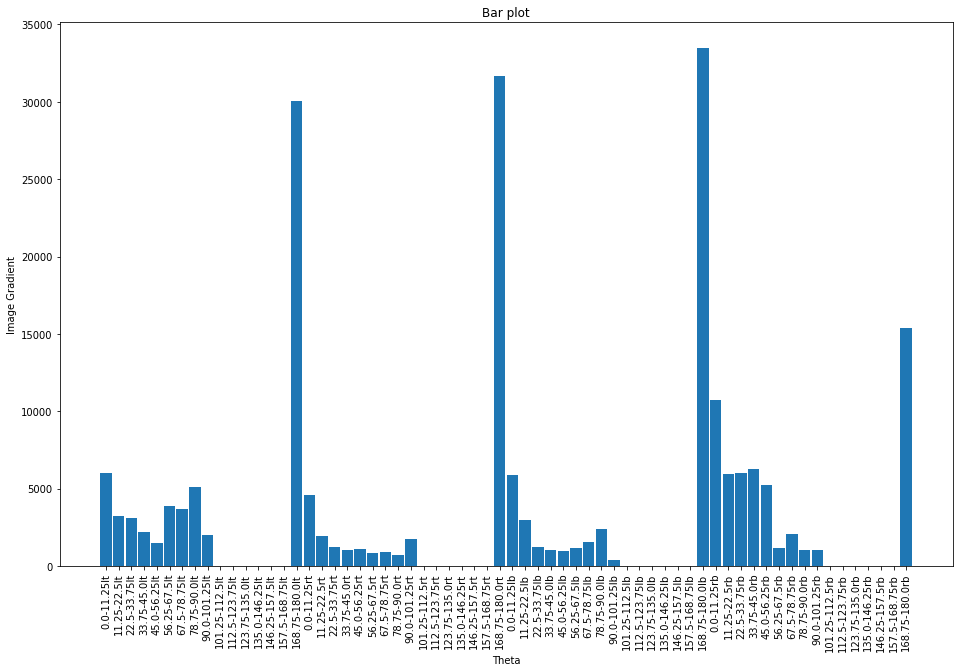

In [56]:
for i in hist_test_concat:
    plotting4(i)
    break

In [57]:
X_train_local = hist_train_concat
Y_train = y_train
X_test_local = hist_test_concat
Y_test = y_test

In [58]:
type(Y_train[0])

numpy.int64

### Normalizing the histograms:

In [59]:
hist_train_concat1 = np.array(hist_train_concat)
hist_train_concat_norm = hist_train_concat1/hist_train_concat1.sum()
hist_train_concat_norm = np.absolute(hist_train_concat_norm)

In [60]:
# for i in hist_train_concat_norm[0:2]:
#     plotting4(i)

In [61]:
hist_test_concat1 = np.array(hist_test_concat)
hist_test_concat_norm = hist_test_concat1/hist_test_concat1.sum()
hist_test_concat_norm = np.absolute(hist_test_concat_norm)

In [62]:
X_train_local_norm = hist_train_concat_normy_pred_gini_global_norm = prediction(X_test_global_norm, clf_gini_global_norm)
dt_gini_accuracy_global_norm = cal_accuracy(Y_test, y_pred_gini_global_norm)
dt_gini_accuracy_global_norm
X_test_local_norm = hist_test_concat_norm

NameError: name 'prediction' is not defined

# KNN:

### For simple histogram:

In [138]:
k =[KNeighborsClassifier(n_neighbors=i+1) for i in range(25)]

In [139]:
f_local = [i.fit(X_train_local, Y_train) for i in k]

In [340]:
s_local_train = [i.score(X_train_local,Y_train) for i in f_local]

    Accuracy
0   0.162562
1   0.140966
2   0.150475
3   0.150406
4   0.154237
5   0.163015
6   0.158452
7   0.164374
8   0.163781
9   0.163154
10  0.165976
11  0.155665
12  0.152949
13  0.149396
14  0.149256
15  0.146748
16  0.145947
17  0.145738
18  0.146714
19  0.145042
20  0.144206
21  0.143265
22  0.143405
23  0.143126
24  0.143021


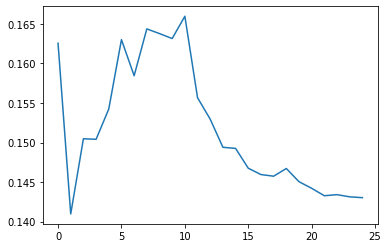

In [341]:
df_local_train = pd.DataFrame(s_local_train, columns = ["Accuracy"])
print(df_local_train)
plt.plot(df_local_train)
plt.show()

In [342]:
knn_accuracy_local_train = s_local_train[10]
print(knn_accuracy_local_train)

0.16597582639590372


In [343]:
y_pred_local_train = f_local[0].predict(X_train_local)
y_pred_local_train

array([6, 6, 6, ..., 6, 3, 6])

In [344]:
print(confusion_matrix(y_pred_local_train, Y_train))

[[ 157   16  224  222  167  228   79]
 [   0    0    0    0    0    0    0]
 [1036   73 1216 2740 1389 1327 1048]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [2752  340 2569 4139 3336 3182 1932]
 [  50    7   88  114   73   93  112]]


In [140]:
s_local = [i.score(X_train_local,Y_train) for i in f_local]

    Accuracy
0   0.390359
1   0.338813
2   0.330872
3   0.330872
4   0.333380
5   0.330872
6   0.333937
7   0.333240
8   0.328643
9   0.321259
10  0.324185
11  0.322235
12  0.319170
13  0.316244
14  0.321677
15  0.317637
16  0.315687
17  0.316941
18  0.316244
19  0.316105
20  0.318612
21  0.314294
22  0.313179
23  0.308303
24  0.311368


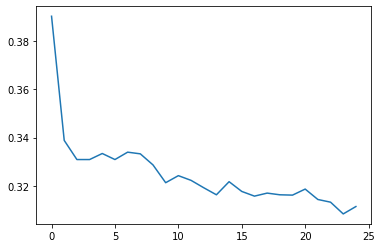

In [141]:
df_local = pd.DataFrame(s_local, columns = ["Accuracy"])
print(df_local)
plt.plot(df_local)
plt.show()

In [142]:
knn_accuracy_local = s_local[1]

In [143]:
y_pred_local = f_local[0].predict(X_test_local)
y_pred_local

array([1, 1, 4, ..., 3, 7, 7])

In [144]:
from sklearn.metrics import confusion_matrix

In [145]:
print(confusion_matrix(y_pred_local, Y_test))

[[343  13 111 182 135 141  51]
 [ 14  67  11  13  18  10   7]
 [112   5 424 184 131 161  62]
 [188   8 169 727 294 292  84]
 [134   7 121 288 362 185  67]
 [105   6 119 242 188 367  48]
 [ 62   5  69 138 105  91 512]]


### For normalized histogram:

In [146]:
f_local_norm = [i.fit(X_train_local_norm, Y_train) for i in k]

In [346]:
s_local_norm_train = [i.score(X_train_local_norm,Y_train) for i in f_local_norm]

    Accuracy
0   0.998642
1   0.692187
2   0.617925
3   0.576614
4   0.541085
5   0.515100
6   0.492807
7   0.478247
8   0.465777
9   0.452889
10  0.442927
11  0.435717
12  0.426939
13  0.420251
14  0.415340
15  0.409523
16  0.403253
17  0.399944
18  0.395555
19  0.392281
20  0.387579
21  0.385419
22  0.381762
23  0.379846
24  0.376746


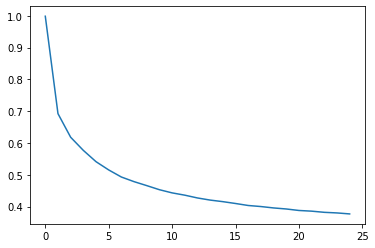

In [407]:
df_local_norm_train = pd.DataFrame(s_local_norm, columns = ["Accuracy"])
print(df_local_norm_train)
plt.plot(df_local_norm_train)
plt.show()

In [408]:
y_pred_local_norm_train = f_local_norm[0].predict(X_train_local_norm)
y_pred_local_norm_train

array([1, 1, 1, ..., 7, 7, 7])

In [409]:
print(confusion_matrix(y_pred_local_norm_train, Y_train))

[[3995    0    4    1    2    6    3]
 [   0  436    1    0    0    0    0]
 [   0    0 4092    0    1    4   16]
 [   0    0    0 7214    0    0    0]
 [   0    0    0    0 4962    1    0]
 [   0    0    0    0    0 4819    0]
 [   0    0    0    0    0    0 3152]]


In [147]:
s_local_norm = [i.score(X_test_local_norm,Y_test) for i in f_local_norm]

    Accuracy
0   0.152132
1   0.143494
2   0.146141
3   0.145723
4   0.141544
5   0.147952
6   0.147256
7   0.145444
8   0.142797
9   0.141126
10  0.144330
11  0.144469
12  0.143215
13  0.145723
14  0.144191
15  0.145166
16  0.144051
17  0.143633
18  0.144051
19  0.145166
20  0.146002
21  0.145723
22  0.146838
23  0.146977
24  0.148370


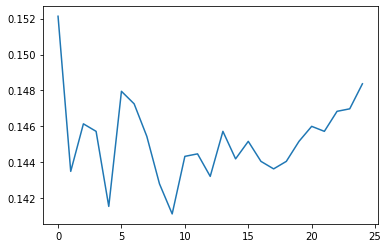

In [148]:
df_local_norm = pd.DataFrame(s_local_norm, columns = ["Accuracy"])
print(df_local_norm)
plt.plot(df_local_norm)
plt.show()

In [149]:
knn_accuracy_local_norm = s_local_norm[24]

In [150]:
y_pred_local_norm = f_local_norm[0].predict(X_test_local_norm)
y_pred_local_norm

array([6, 6, 1, ..., 3, 7, 3])

In [151]:
print(confusion_matrix(y_pred_local_norm, Y_test))

[[ 171   20  211  230  183  238  113]
 [   0    0    1    1    0    0    0]
 [ 436   40  463 1030  591  553  387]
 [  20    1   13   26   42   31   16]
 [   5    1    1    6    8   12    1]
 [ 288   42  282  404  352  356  246]
 [  38    7   53   77   57   57   68]]


## SVM:

### For simple histogram:

### Sigmoid kernel:

In [152]:
classifier_sigmoid_local = SVC(kernel='sigmoid', random_state = 0)
classifier_sigmoid_local.fit(X_train_local,Y_train)

SVC(kernel='sigmoid', random_state=0)

In [431]:
sigmoid_pred_local_train = classifier_sigmoid_local.predict(X_train_local)

In [433]:
cm1_local_train = confusion_matrix(Y_train,sigmoid_pred_local_train)
accuracy_sigmoid_local_train = float(cm1_local_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with sigmoid kernel for train data: ", accuracy_sigmoid_local_train)


Accuracy Of SVM with sigmoid kernel for train data:  0.1694938869344108


In [153]:
sigmoid_pred_local = classifier_sigmoid_local.predict(X_test_local)

In [154]:
cm1_local = confusion_matrix(Y_test,sigmoid_pred_local)
accuracy_sigmoid_local = float(cm1_local.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with sigmoid kernel : ", accuracy_sigmoid_local)


Accuracy Of SVM with sigmoid kernel :  0.16829200334354974


### Polynomial kernel (with degree 1) :

In [155]:
classifier_pol_1_local = SVC(kernel='poly', degree = 1, random_state = 0)
classifier_pol_1_local.fit(X_train_local,Y_train)

SVC(degree=1, kernel='poly', random_state=0)

In [347]:
pol_1_pred_local_train = classifier_pol_1_local.predict(X_train_local)

In [348]:
cm2_local_train = confusion_matrix(Y_train,pol_1_pred_local_train)
accuracy_pol_1_local_train = float(cm2_local_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 for train data: ", accuracy_pol_1_local_train)


Accuracy Of SVM with polynomial kernel having deg 1 :  0.29112821763210145


In [156]:
pol_1_pred_local = classifier_pol_1_local.predict(X_test_local)

In [157]:
cm2_local = confusion_matrix(Y_test,pol_1_pred_local)
accuracy_pol_1_local = float(cm2_local.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 : ", accuracy_pol_1_local)


Accuracy Of SVM with polynomial kernel having deg 1 :  0.29005293953747563


### Polynomial kernel (with degree 3):

In [158]:
classifier_pol_3_local = SVC(kernel='poly', degree = 3, random_state = 0)
classifier_pol_3_local.fit(X_train_local,Y_train)

SVC(kernel='poly', random_state=0)

In [349]:
pol_3_pred_local_train = classifier_pol_3_local.predict(X_train_local)

In [350]:
cm3_local_train = confusion_matrix(Y_train,pol_3_pred_local_train)
accuracy_pol_3_local_train = float(cm3_local_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 for train data: ", accuracy_pol_3_local_train)


Accuracy Of SVM with polynomial kernel having deg 3 :  0.30405099446166706


In [159]:
pol_3_pred_local = classifier_pol_3_local.predict(X_test_local)

In [160]:
cm3_local = confusion_matrix(Y_test,pol_3_pred_local)
accuracy_pol_3_local = float(cm3_local.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 : ", accuracy_pol_3_local)


Accuracy Of SVM with polynomial kernel having deg 3 :  0.29102814154360546


### Linear kernel:

In [161]:
# classifier_linear = SVC(kernel='linear', random_state = 0)
# classifier_linear.fit(X_train,Y_train)

### RBF kernel:

In [162]:
classifier_rbf_local = SVC(kernel='rbf', random_state = 0)
classifier_rbf_local.fit(X_train_local,Y_train)

SVC(random_state=0)

In [434]:
rbf_pred_local_train = classifier_rbf_local.predict(X_train_local)

In [436]:
cm4_local_train = confusion_matrix(Y_train,rbf_pred_local_train)
accuracy_rbf_local_train = float(cm4_local_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with rbf kernel for train data : ", accuracy_rbf_local_train)


Accuracy Of SVM with rbf kernel for train data :  0.3265526489950886


In [163]:
rbf_pred_local = classifier_rbf_local.predict(X_test_local)

In [164]:
cm4_local = confusion_matrix(Y_test,rbf_pred_local)
accuracy_rbf_local = float(cm4_local.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with rbf kernel : ", accuracy_rbf_local)


Accuracy Of SVM with rbf kernel :  0.3131791585399833


In [437]:
df_svm_local_train = pd.DataFrame([accuracy_sigmoid_local_train, accuracy_pol_1_local_train, accuracy_pol_3_local_train, accuracy_rbf_local_train],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_local_train

,Accuracy
sigmoid,0.169494
pol_1,0.291128
pol_3,0.304051
rbf,0.326553


In [165]:
df_svm_local = pd.DataFrame([accuracy_sigmoid_local, accuracy_pol_1_local, accuracy_pol_3_local, accuracy_rbf_local],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_local

,Accuracy
sigmoid,0.168292
pol_1,0.290053
pol_3,0.291028
rbf,0.313179


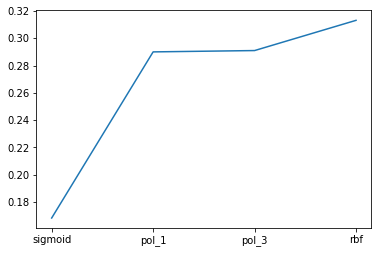

In [166]:
plt.plot(df_svm_local)

### For normalized histogram:

### Sigmoid kernel:

In [167]:
classifier_sigmoid_local_norm = SVC(kernel='sigmoid', random_state = 0)
classifier_sigmoid_local_norm.fit(X_train_local_norm,Y_train)

SVC(kernel='sigmoid', random_state=0)

In [405]:
sigmoid_pred_local_norm_train = classifier_sigmoid_local_norm.predict(X_train_local_norm)

In [413]:
cm1_local_norm_train = confusion_matrix(Y_train,sigmoid_pred_local_norm_train)
accuracy_sigmoid_local_norm_train = float(cm1_local_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with sigmoid kernel for train data : ", accuracy_sigmoid_local_norm_train)


Accuracy Of SVM with sigmoid kernel for train data :  0.1694938869344108


In [168]:
sigmoid_pred_local_norm = classifier_sigmoid_local_norm.predict(X_test_local_norm)

In [169]:
cm1_local_norm = confusion_matrix(Y_test,sigmoid_pred_local_norm)
accuracy_sigmoid_local_norm = float(cm1_local_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with sigmoid kernel : ", accuracy_sigmoid_local_norm)


Accuracy Of SVM with sigmoid kernel :  0.13360267483978824


### Polynomial kernel (with degree 1) :

In [170]:
classifier_pol_1_local_norm = SVC(kernel='poly', degree = 1, random_state = 0)
classifier_pol_1_local_norm.fit(X_train_local_norm,Y_train)

SVC(degree=1, kernel='poly', random_state=0)

In [355]:
pol_1_pred_local_norm_train = classifier_pol_1_local_norm.predict(X_train_local_norm)

In [356]:
cm2_local_norm_train = confusion_matrix(Y_train,pol_1_pred_local_norm_train)
accuracy_pol_1_local_norm_train = float(cm2_local_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 for train data: ", accuracy_pol_1_local_norm_train)


Accuracy Of SVM with polynomial kernel having deg 1 for train data:  0.29112821763210145


In [171]:
pol_1_pred_local_norm = classifier_pol_1_local_norm.predict(X_test_local_norm)

In [172]:
cm2_local_norm = confusion_matrix(Y_test,pol_1_pred_local_norm)
accuracy_pol_1_local_norm = float(cm2_local_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 : ", accuracy_pol_1_local_norm)


Accuracy Of SVM with polynomial kernel having deg 1 :  0.2135692393424352


### Polynomial kernel (with degree 3):

In [173]:
classifier_pol_3_local_norm = SVC(kernel='poly', degree = 3, random_state = 0)
classifier_pol_3_local_norm.fit(X_train_local_norm,Y_train)

SVC(kernel='poly', random_state=0)

In [357]:
pol_3_pred_local_norm_train = classifier_pol_3_local_norm.predict(X_train_local_norm)

In [358]:
cm3_local_norm_train = confusion_matrix(Y_train,pol_3_pred_local_norm_train)
accuracy_pol_3_local_norm_train = float(cm3_local_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 for train data: ", accuracy_pol_3_local_norm_train)


Accuracy Of SVM with polynomial kernel having deg 3 for train data:  0.30405099446166706


In [174]:
pol_3_pred_local_norm = classifier_pol_3_local_norm.predict(X_test_local_norm)

In [175]:
cm3_local_norm = confusion_matrix(Y_test,pol_3_pred_local_norm)
accuracy_pol_3_local_norm = float(cm3_local_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 : ", accuracy_pol_3_local_norm)


Accuracy Of SVM with polynomial kernel having deg 3 :  0.24212872666480914


### Linear kernel:

In [176]:
# classifier_linear = SVC(kernel='linear', random_state = 0)
# classifier_linear.fit(X_train,Y_train)

### RBF kernel:

In [177]:
classifier_rbf_local_norm = SVC(kernel='rbf', random_state = 0)
classifier_rbf_local_norm.fit(X_train_local_norm,Y_train)

SVC(random_state=0)

In [359]:
rbf_pred_local_norm_train = classifier_rbf_local_norm.predict(X_train_local_norm)

In [360]:
cm4_local_norm_train = confusion_matrix(Y_train,rbf_pred_local_norm_train)
accuracy_rbf_local_norm_train = float(cm4_local_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with rbf kernel for train data: ", accuracy_rbf_local_norm_train)


Accuracy Of SVM with rbf kernel for train data:  0.3265526489950886


In [178]:
rbf_pred_local_norm = classifier_rbf_local_norm.predict(X_test_local_norm)

In [179]:
cm4_local_norm = confusion_matrix(Y_test,rbf_pred_local_norm)
accuracy_rbf_local_norm = float(cm4_local_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with rbf kernel : ", accuracy_rbf_local_norm)


Accuracy Of SVM with rbf kernel :  0.16439119531903038


In [420]:
df_svm_local_norm_train = pd.DataFrame([accuracy_sigmoid_local_norm_train, accuracy_pol_1_local_norm_train, accuracy_pol_3_local_norm_train, accuracy_rbf_local_norm_train],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_local_norm_train

,Accuracy
sigmoid,0.169494
pol_1,0.291128
pol_3,0.304051
rbf,0.326553


In [180]:
df_svm_local_norm = pd.DataFrame([accuracy_sigmoid_local_norm, accuracy_pol_1_local_norm, accuracy_pol_3_local_norm, accuracy_rbf_local_norm],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_local_norm

,Accuracy
sigmoid,0.133603
pol_1,0.213569
pol_3,0.242129
rbf,0.164391


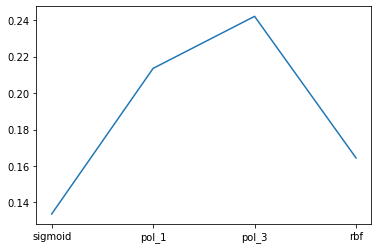

In [181]:
plt.plot(df_svm_local_norm)

## Logistic Regression:

### For simple histogram:

In [182]:
model_local = LogisticRegression(solver = 'newton-cg', random_state = 0)
model_local.fit(X_train_local, Y_train)

/home/aravind_sundarraj0112/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(random_state=0, solver='newton-cg')

In [361]:
y_log_pred_local_train = model_local.predict(X_train_local)
pd.value_counts(y_log_pred_local_train)

4    14772
6     3382
5     3331
7     2883
3     2518
1     1817
2        6
dtype: int64

In [362]:
logistic_acc_local_train = model_local.score(X_train_local, Y_train)
logistic_acc_local_train

0.30788254554320943

In [183]:
y_log_pred_local = model_local.predict(X_test_local)
pd.value_counts(y_log_pred_local)

4    3709
6     875
5     788
7     699
3     651
1     454
2       2
dtype: int64

In [184]:
logistic_acc_local = model_local.score(X_test_local, Y_test)
logistic_acc_local

0.30955697966007245

### For normalized histogram:

In [185]:
model_local_norm = LogisticRegression(solver = 'newton-cg', random_state = 0)
model_local_norm.fit(X_train_local_norm, Y_train)

LogisticRegression(random_state=0, solver='newton-cg')

In [363]:
y_log_pred_local_norm_train = model_local_norm.predict(X_train_local_norm)
pd.value_counts(y_log_pred_local_norm_train)

4    28709
dtype: int64

In [364]:
logistic_acc_local_norm_train = model_local_norm.score(X_train_local_norm, Y_train)
logistic_acc_local_norm_train

0.2513149186666202

In [186]:
y_log_pred_local_norm = model_local_norm.predict(X_test_local_norm)
pd.value_counts(y_log_pred_local_norm)

4    7178
dtype: int64

In [187]:
logistic_acc_local_norm = model_local_norm.score(X_test_local_norm, Y_test)
logistic_acc_local_norm

0.24714405126776262

## Decision tree:

### For simple histogram:

In [188]:
clf_gini_local = train_using_gini(X_train_local, X_test_local, Y_train)
clf_entropy_local = tarin_using_entropy(X_train_local, X_test_local, Y_train)

In [365]:
y_pred_gini_local_train = prediction(X_train_local, clf_gini_local)
cal_accuracy(Y_train, y_pred_gini_local_train)

Predicted values:
[6 4 4 ... 4 4 7]
Confusion Matrix:  [[   0    0    0 2306  375  909  405]
 [   0    0    0  172   70  113   81]
 [   0    0    0 2265  444  812  576]
 [   0    0    0 4983  730  990  512]
 [   0    0    0 2739  901  949  376]
 [   0    0    0 2792  533 1113  392]
 [   0    0    0 1561  421  521  668]]
Accuracy :  26.698944581838447


In [366]:
y_pred_entropy_local_train = prediction(X_train_local, clf_entropy_local)
cal_accuracy(Y_train, y_pred_entropy_local_train)

Predicted values:
[5 6 4 ... 4 4 7]
Confusion Matrix:  [[   0    0    0 2073  668  853  401]
 [   0    0    0  157  100   98   81]
 [   0    0    0 2074  681  770  572]
 [   0    0    0 4779 1099  838  499]
 [   0    0    0 2540 1268  786  371]
 [   0    0    0 2558  963  922  387]
 [   0    0    0 1415  564  531  661]]
Accuracy :  26.577031592880278


In [189]:
y_pred_gini_local = prediction(X_test_local, clf_gini_local)
cal_accuracy(Y_test, y_pred_gini_local)

Predicted values:
[5 7 4 ... 7 5 4]
Confusion Matrix:  [[   0    0    0  574   92  198   94]
 [   0    0    0   61   12   23   15]
 [   0    0    0  561  127  194  142]
 [   0    0    0 1262  163  236  113]
 [   0    0    0  717  191  234   91]
 [   0    0    0  710  138  304   95]
 [   0    0    0  411  118  133  169]]
Accuracy :  26.831986625801058


In [190]:
y_pred_entropy_local = prediction(X_test_local, clf_entropy_local)
cal_accuracy(Y_test, y_pred_entropy_local)

Predicted values:
[5 7 4 ... 7 5 4]
Confusion Matrix:  [[   0    0    0  509  157  200   92]
 [   0    0    0   53   16   27   15]
 [   0    0    0  521  186  179  138]
 [   0    0    0 1203  258  204  109]
 [   0    0    0  674  294  175   90]
 [   0    0    0  653  256  245   93]
 [   0    0    0  363  150  149  169]]
Accuracy :  26.623014767344667


### For normalized histogram:

In [191]:
clf_gini_local_norm = train_using_gini(X_train_local_norm, X_test_local_norm, Y_train)
clf_entropy_local_norm = tarin_using_entropy(X_train_local_norm, X_test_local_norm, Y_train)

In [367]:
y_pred_gini_local_norm_train = prediction(X_train_local_norm, clf_gini_local_norm)
cal_accuracy(Y_train, y_pred_gini_local_norm_train)

Predicted values:
[4 4 4 ... 4 4 4]
Confusion Matrix:  [[   1    0    2 3990    2    0    0]
 [   0    0    0  436    0    0    0]
 [   1    0   14 4080    0    1    1]
 [   0    0    0 7213    2    0    0]
 [   1    0    0 4946   17    0    1]
 [   1    0    2 4813    7    7    0]
 [   1    0    1 3165    0    1    3]]
Accuracy :  25.27082099689993


In [368]:
y_pred_entropy_local_norm_train = prediction(X_train_local_norm, clf_entropy_local_norm)
cal_accuracy(Y_train, y_pred_entropy_local_norm_train)

Predicted values:
[4 4 4 ... 4 4 4]
Confusion Matrix:  [[   0    0    4 3989    2    0    0]
 [   0    0    0  436    0    0    0]
 [   0    0   25 4070    0    0    2]
 [   0    0    4 7209    2    0    0]
 [   0    0    5 4943   17    0    0]
 [   0    0   12 4811    7    0    0]
 [   0    0    1 3166    0    0    4]]
Accuracy :  25.27082099689993


In [192]:
y_pred_gini_local_norm = prediction(X_test_local_norm, clf_gini_local_norm)
cal_accuracy(Y_test, y_pred_gini_local_norm)

Predicted values:
[1 3 1 ... 1 1 1]
Confusion Matrix:  [[ 618    0  111  201    1   19    8]
 [  70    0   15   22    0    2    2]
 [ 686    0  158  162    0   12    6]
 [1102    0  360  287    1   17    7]
 [ 768    0  216  232    5   10    2]
 [ 697    0  181  336    3   20   10]
 [ 632    0   86  102    0    9    2]]
Accuracy :  15.18528838116467


In [193]:
y_pred_entropy_local_norm = prediction(X_test_local_norm, clf_entropy_local_norm)
cal_accuracy(Y_test, y_pred_entropy_local_norm)

Predicted values:
[3 3 3 ... 3 3 3]
Confusion Matrix:  [[   0    0  814  126    1    0   17]
 [   0    0   89   20    0    0    2]
 [   0    0  907  101    0    0   16]
 [   0    0 1566  164    1    0   43]
 [   0    0 1015  163    5    0   50]
 [   0    0 1008  193    3    0   43]
 [   0    0  760   57    0    0   14]]
Accuracy :  15.18528838116467


## Random Forest:

### For simple histogram:

### For 200 values of estimators:

In [194]:
#Create a Gaussian Classifier
clf_local = RandomForestClassifier(n_estimators = 500)

clf_local.fit(X_train_local,Y_train)

y_pred_rf_local = clf_local.predict(X_test_local)

rf_accuracy_local = metrics.accuracy_score(Y_test, y_pred_rf_local)
print("Accuracy:",rf_accuracy_local)

Accuracy: 0.4165505711897464


Text(0, 0.5, 'Training Accuracy')

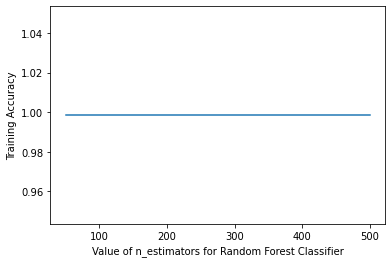

In [438]:
rf_lc_est = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_local_train =[]
for k in rf_lc_est:
    rfc_local = RandomForestClassifier(n_estimators=k)
    rfc_local.fit(X_train_local, Y_train)
    y_pred_rf_local = rfc_local.predict(X_train_local)
    accuracies_local_train.append(metrics.accuracy_score(Y_train, y_pred_rf_local))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_local_train)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Training Accuracy')

In [439]:
rf_accuracy_local_train = max(accuracies_local_train)
rf_accuracy_local_train

0.9985022118499425

Text(0, 0.5, 'Testing Accuracy')

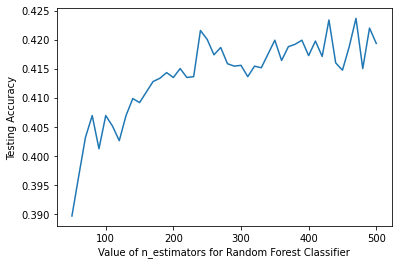

In [195]:
rf_lc_est = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_local =[]
for k in rf_lc_est:
    rfc_local = RandomForestClassifier(n_estimators=k)
    rfc_local.fit(X_train_local, Y_train)
    y_pred_rf_local = rfc_local.predict(X_test_local)
    accuracies_local.append(metrics.accuracy_score(Y_test, y_pred_rf_local))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_local)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [196]:
rf_accuracy_local = max(accuracies_local)
rf_accuracy_local

0.42365561437726384

In [197]:
# np.argmax(np.array(accuracies))

### For normalized histogram:

Text(0, 0.5, 'Training Accuracy')

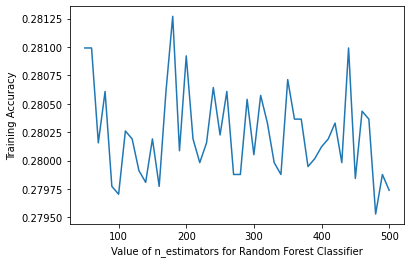

In [440]:
rf_lc_est_norm = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_local_norm_train =[]
for k in rf_lc_est_norm:
    rfc_local_norm = RandomForestClassifier(n_estimators=k)
    rfc_local_norm.fit(X_train_local_norm, Y_train)
    y_pred_rf_local_norm = rfc_local_norm.predict(X_train_local_norm)
    accuracies_local_norm_train.append(metrics.accuracy_score(Y_train, y_pred_rf_local_norm))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_local_norm_train)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Training Accuracy')

In [441]:
rf_accuracy_local_norm_train = max(accuracies_local_norm_train)
rf_accuracy_local_norm_train

0.2812706816677697

Text(0, 0.5, 'Testing Accuracy')

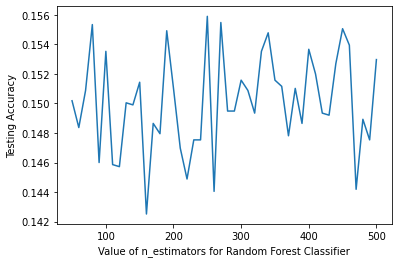

In [198]:
rf_lc_est_norm = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_local_norm =[]
for k in rf_lc_est_norm:
    rfc_local_norm = RandomForestClassifier(n_estimators=k)
    rfc_local_norm.fit(X_train_local_norm, Y_train)
    y_pred_rf_local_norm = rfc_local_norm.predict(X_test_local_norm)
    accuracies_local_norm.append(metrics.accuracy_score(Y_test, y_pred_rf_local_norm))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_local_norm)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [199]:
rf_accuracy_local_norm = max(accuracies_local_norm)
rf_accuracy_local_norm

0.1558930064084703

In [200]:
#Create a Gaussian Classifier
clf_local_norm = RandomForestClassifier(n_estimators = 500)

clf_local_norm.fit(X_train_local_norm,Y_train)

y_pred_rf_local_norm = clf_local_norm.predict(X_test_local_norm)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_rf_local_norm))

Accuracy: 0.14878796322095292


# GLOBAL + LOCAL:

In [ ]:
hist_train_concat_final = [np.hstack((hist_train[i],hist_train_concat[i])) for i in range(len(hist_train))]
hist_test_concat_final = [np.hstack((hist_test[i],hist_test_concat[i])) for i in range(len(hist_test))]

In [ ]:
for i in hist_train_concat_final[0:3]:
    plotting_f(i)

In [ ]:
X_train_final = hist_train_concat_final
X_test_final = hist_test_concat_final

In [ ]:
hist_train_concat_norm_final = [np.hstack((hist_train_norm[i],hist_train_concat_norm[i])) for i in range(len(hist_train_norm))]
hist_test_concat_norm_final = [np.hstack((hist_test_norm[i],hist_test_concat_norm[i])) for i in range(len(hist_test_norm))]

In [ ]:
X_train_final_norm = hist_train_concat_norm_final
X_test_final_norm = hist_test_concat_norm_final

# KNN :

### For simple histogram:

In [206]:
k =[KNeighborsClassifier(n_neighbors=i+1) for i in range(25)]

In [207]:
f_final = [i.fit(X_train_final, Y_train) for i in k]

In [370]:
s_final_train = [i.score(X_train_final,Y_train) for i in f_final]

    Accuracy
0   0.168553
1   0.140409
2   0.150893
3   0.164826
4   0.163607
5   0.168379
6   0.168205
7   0.168484
8   0.168449
9   0.168449
10  0.168101
11  0.155700
12  0.150580
13  0.145773
14  0.149047
15  0.143474
16  0.142185
17  0.143196
18  0.142673
19  0.142882
20  0.142917
21  0.142952
22  0.142847
23  0.142917
24  0.142917


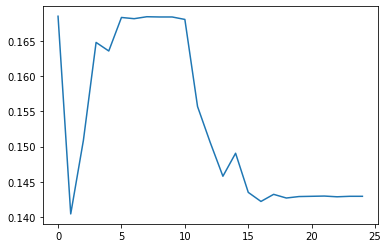

In [371]:
df_final_train = pd.DataFrame(s_final_train, columns = ["Accuracy"])
print(df_final_train)
plt.plot(df_final_train)
plt.show()

In [402]:
knn_accuracy_final_train = s_final_train[7]

In [403]:
y_pred_final_train = f_final[0].predict(X_train_final)
y_pred_final_train

array([6, 6, 6, ..., 6, 6, 6])

In [404]:
print(confusion_matrix(y_pred_final_train, Y_train))

[[   8    0    4    3    4    2    1]
 [   0    0    0    0    0    0    0]
 [   1    0    3    0    3    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [3986  436 4090 7212 4958 4828 3170]
 [   0    0    0    0    0    0    0]]


In [208]:
s_final = [i.score(X_test_final,Y_test) for i in f_final]

    Accuracy
0   0.390917
1   0.335748
2   0.326971
3   0.324742
4   0.322374
5   0.320702
6   0.313318
7   0.305656
8   0.308860
9   0.311229
10  0.312065
11  0.308860
12  0.310254
13  0.305656
14  0.305935
15  0.307746
16  0.308860
17  0.304960
18  0.305656
19  0.302731
20  0.300084
21  0.300502
22  0.303009
23  0.300641
24  0.300780


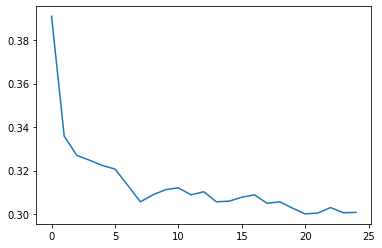

In [209]:
df_final = pd.DataFrame(s_final, columns = ["Accuracy"])
print(df_final)
plt.plot(df_final)
plt.show()

In [210]:
knn_accuracy_final = s_final[1]

In [211]:
y_pred_final = f_final[0].predict(X_test_final)
y_pred_final

array([1, 1, 7, ..., 3, 7, 7])

In [212]:
print(confusion_matrix(y_pred_final, Y_test))

[[344   9 116 211 147 146  56]
 [  9  61  12  13  15   8   5]
 [111  10 412 165 128 154  67]
 [184  10 171 724 304 289  82]
 [139   6 118 270 372 189  60]
 [104   6 130 235 161 375  43]
 [ 67   9  65 156 106  86 518]]


### For normalized histogram:

In [213]:
f_final_norm = [i.fit(X_train_final_norm, Y_train) for i in k]

In [372]:
s_final_norm_train = [i.score(X_train_final_norm,Y_train) for i in f_final_norm]

    Accuracy
0   0.998084
1   0.692257
2   0.614581
3   0.573444
4   0.541363
5   0.511059
6   0.488000
7   0.473197
8   0.458637
9   0.449093
10  0.440141
11  0.433105
12  0.424989
13  0.419694
14  0.414226
15  0.409175
16  0.403706
17  0.397332
18  0.391689
19  0.388763
20  0.385907
21  0.381518
22  0.379080
23  0.376049
24  0.372322


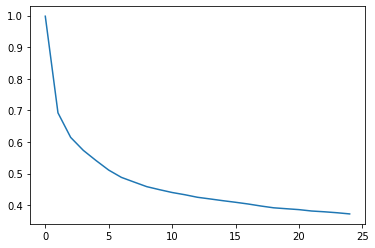

In [373]:
df_final_norm_train = pd.DataFrame(s_final_norm_train, columns = ["Accuracy"])
print(df_final_norm_train)
plt.plot(df_final_norm_train)
plt.show()

In [399]:
knn_accuracy_final_norm_train = s_final_norm[1]

In [400]:
y_pred_final_norm_train = f_final_norm[0].predict(X_train_final_norm)
y_pred_final_norm_train

array([1, 1, 1, ..., 7, 7, 7])

In [401]:
print(confusion_matrix(y_pred_final_norm_train, Y_train))

[[3995    0    4    1    3   10    3]
 [   0  436    1    0    0    0    3]
 [   0    0 4092    0    4    7   17]
 [   0    0    0 7214    0    0    1]
 [   0    0    0    0 4958    1    0]
 [   0    0    0    0    0 4812    0]
 [   0    0    0    0    0    0 3147]]


In [214]:
s_final_norm = [i.score(X_test_final_norm,Y_test) for i in f_final_norm]

    Accuracy
0   0.151156
1   0.140568
2   0.146559
3   0.150738
4   0.134160
5   0.135274
6   0.136250
7   0.134578
8   0.137086
9   0.135414
10  0.135414
11  0.144330
12  0.144191
13  0.141962
14  0.143076
15  0.143633
16  0.143912
17  0.143215
18  0.144191
19  0.144609
20  0.144748
21  0.145723
22  0.145584
23  0.145026
24  0.145305


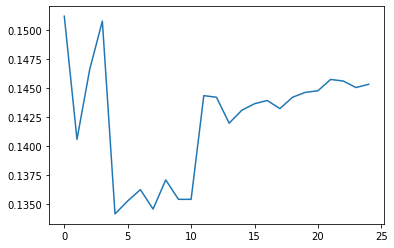

In [215]:
df_final_norm = pd.DataFrame(s_final_norm, columns = ["Accuracy"])
print(df_final_norm)
plt.plot(df_final_norm)
plt.show()

In [216]:
knn_accuracy_final_norm = s_final_norm[1]

In [217]:
y_pred_final_norm = f_final_norm[0].predict(X_test_final_norm)
y_pred_final_norm

array([6, 6, 1, ..., 6, 6, 6])

In [218]:
print(confusion_matrix(y_pred_final_norm, Y_test))

[[219  28 274 329 244 266 203]
 [  1   0   0   2   2   3   1]
 [171  10 164 494 281 303 131]
 [ 13   0   9  12  24  20   5]
 [  7   1   2   6   8   7   1]
 [509  69 516 848 619 592 400]
 [ 38   3  59  83  55  56  90]]


## SVM:

### For simple histogram:

### Sigmoid kernel:

In [219]:
classifier_sigmoid_final = SVC(kernel='sigmoid', random_state = 0)
classifier_sigmoid_final.fit(X_train_final,Y_train)

SVC(kernel='sigmoid', random_state=0)

In [397]:
sigmoid_pred_final_train = classifier_sigmoid_final.predict(X_train_final)

In [398]:
cm1_final_train = confusion_matrix(Y_train,sigmoid_pred_final_train)
accuracy_sigmoid_final_train = float(cm1_final_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with sigmoid kernel for train data: ", accuracy_sigmoid_final_train)


Accuracy Of SVM with sigmoid kernel for train data:  0.15824305966770003


In [445]:
sigmoid_pred_final = classifier_sigmoid_final.predict(X_test_final)

In [446]:
cm1_final = confusion_matrix(Y_test,sigmoid_pred_final)
accuracy_sigmoid_final = float(cm1_final.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with sigmoid kernel : ", accuracy_sigmoid_final)


Accuracy Of SVM with sigmoid kernel :  0.16188353301755365


### Polynomial kernel (with degree 1) :

In [222]:
classifier_pol_1_final = SVC(kernel='poly', degree = 1, random_state = 0)
classifier_pol_1_final.fit(X_train_final,Y_train)

SVC(degree=1, kernel='poly', random_state=0)

In [395]:
pol_1_pred_final_train = classifier_pol_1_final.predict(X_train_final)

In [396]:
cm2_final_train = confusion_matrix(Y_train,pol_1_pred_final_train)
accuracy_pol_1_final_train = float(cm2_final_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 for train data: ", accuracy_pol_1_final_train)


Accuracy Of SVM with polynomial kernel having deg 1 for train data:  0.2625309136507715


In [223]:
pol_1_pred_final = classifier_pol_1_final.predict(X_test_final)

In [224]:
cm2_final = confusion_matrix(Y_test,pol_1_pred_final)
accuracy_pol_1_final = float(cm2_final.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 : ", accuracy_pol_1_final)


Accuracy Of SVM with polynomial kernel having deg 1 :  0.2581499024797994


### Polynomial kernel (with degree 3):

In [225]:
classifier_pol_3_final = SVC(kernel='poly', degree = 3, random_state = 0)
classifier_pol_3_final.fit(X_train_final,Y_train)

SVC(kernel='poly', random_state=0)

In [393]:
pol_3_pred_final_train = classifier_pol_3_final.predict(X_train_final)

In [394]:
cm3_final_train = confusion_matrix(Y_train,pol_3_pred_final_train)
accuracy_pol_3_final_train = float(cm3_final_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 for train data : ", accuracy_pol_3_final_train)


Accuracy Of SVM with polynomial kernel having deg 3 for train data :  0.2854157232923473


In [226]:
pol_3_pred_final = classifier_pol_3_final.predict(X_test_final)

In [227]:
cm3_final = confusion_matrix(Y_test,pol_3_pred_final)
accuracy_pol_3_final = float(cm3_final.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 : ", accuracy_pol_3_final)


Accuracy Of SVM with polynomial kernel having deg 3 :  0.2768180551685706


### Linear kernel:

In [228]:
# classifier_linear = SVC(kernel='linear', random_state = 0)
# classifier_linear.fit(X_train,Y_train)

### RBF kernel:

In [229]:
classifier_rbf_final = SVC(kernel='rbf', random_state = 0)
classifier_rbf_final.fit(X_train_final,Y_train)

SVC(random_state=0)

In [391]:
rbf_pred_final_train = classifier_rbf_final.predict(X_train_final)

In [392]:
cm4_final_train = confusion_matrix(Y_train,rbf_pred_final_train)
accuracy_rbf_final_train = float(cm4_final_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with rbf kernel for train data : ", accuracy_rbf_final_train)


Accuracy Of SVM with rbf kernel for train data :  0.30318018739768016


In [230]:
rbf_pred_final = classifier_rbf_final.predict(X_test_final)

In [231]:
cm4_final = confusion_matrix(Y_test,rbf_pred_final)
accuracy_rbf_final = float(cm4_final.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with rbf kernel : ", accuracy_rbf_final)


Accuracy Of SVM with rbf kernel :  0.2986904430203399


In [421]:
df_svm_final_train = pd.DataFrame([accuracy_sigmoid_final_train, accuracy_pol_1_final_train, accuracy_pol_3_final_train, accuracy_rbf_final_train],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_final_train

,Accuracy
sigmoid,0.158243
pol_1,0.262531
pol_3,0.285416
rbf,0.303180


In [232]:
df_svm_final = pd.DataFrame([accuracy_sigmoid_final, accuracy_pol_1_final, accuracy_pol_3_final, accuracy_rbf_final],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_final

,Accuracy
sigmoid,0.161884
pol_1,0.258150
pol_3,0.276818
rbf,0.298690


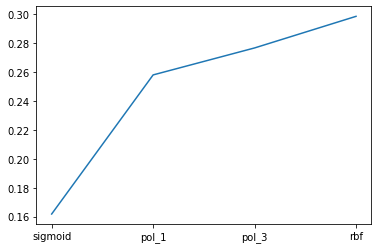

In [233]:
plt.plot(df_svm_final)

### For normalized histogram:

### Sigmoid kernel:

In [234]:
classifier_sigmoid_final_norm = SVC(kernel='sigmoid', random_state = 0)
classifier_sigmoid_final_norm.fit(X_train_final_norm,Y_train)

SVC(kernel='sigmoid', random_state=0)

In [389]:
sigmoid_pred_final_norm_train = classifier_sigmoid_final_norm.predict(X_train_final_norm)

In [390]:
cm1_final_norm_train = confusion_matrix(Y_train,sigmoid_pred_final_norm_train)
accuracy_sigmoid_final_norm_train = float(cm1_final_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with sigmoid kernel for train data : ", accuracy_sigmoid_final_norm_train)


Accuracy Of SVM with sigmoid kernel for train data :  0.15852171792817582


In [235]:
sigmoid_pred_final_norm = classifier_sigmoid_final_norm.predict(X_test_final_norm)

In [236]:
cm1_final_norm = confusion_matrix(Y_test,sigmoid_pred_final_norm)
accuracy_sigmoid_final_norm = float(cm1_final_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with sigmoid kernel : ", accuracy_sigmoid_final_norm)


Accuracy Of SVM with sigmoid kernel :  0.1337419894120925


### Polynomial kernel (with degree 1) :

In [237]:
classifier_pol_1_final_norm = SVC(kernel='poly', degree = 1, random_state = 0)
classifier_pol_1_final_norm.fit(X_train_final_norm,Y_train)

SVC(degree=1, kernel='poly', random_state=0)

In [375]:
pol_1_pred_final_norm_train = classifier_pol_1_final_norm.predict(X_train_final_norm)

In [376]:
cm2_final_norm_train = confusion_matrix(Y_train,pol_1_pred_final_norm_train)
accuracy_pol_1_final_norm_train = float(cm2_final_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 for train data: ", accuracy_pol_1_final_norm_train)


Accuracy Of SVM with polynomial kernel having deg 1 for train data:  0.2634017207147584


In [238]:
pol_1_pred_final_norm = classifier_pol_1_final_norm.predict(X_test_final_norm)

In [239]:
cm2_final_norm = confusion_matrix(Y_test,pol_1_pred_final_norm)
accuracy_pol_1_final_norm = float(cm2_final_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 1 : ", accuracy_pol_1_final_norm)


Accuracy Of SVM with polynomial kernel having deg 1 :  0.23418779604346615


### Polynomial kernel (with degree 3):

In [240]:
classifier_pol_3_final_norm = SVC(kernel='poly', degree = 3, random_state = 0)
classifier_pol_3_final_norm.fit(X_train_final_norm,Y_train)

SVC(kernel='poly', random_state=0)

In [377]:
pol_3_pred_final_norm_train = classifier_pol_3_final_norm.predict(X_train_final_norm)

In [378]:
cm3_final_norm_train = confusion_matrix(Y_train,pol_3_pred_final_norm_train)
accuracy_pol_3_final_norm_train = float(cm3_final_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 for train data: ", accuracy_pol_3_final_norm_train)


Accuracy Of SVM with polynomial kernel having deg 3 for train data:  0.2856943815528232


In [241]:
pol_3_pred_final_norm = classifier_pol_3_final_norm.predict(X_test_final_norm)

In [242]:
cm3_final_norm = confusion_matrix(Y_test,pol_3_pred_final_norm)
accuracy_pol_3_final_norm = float(cm3_final_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with polynomial kernel having deg 3 : ", accuracy_pol_3_final_norm)


Accuracy Of SVM with polynomial kernel having deg 3 :  0.2230426302591251


### Linear kernel:

In [243]:
# classifier_linear = SVC(kernel='linear', random_state = 0)
# classifier_linear.fit(X_train,Y_train)

### RBF kernel:

In [244]:
classifier_rbf_final_norm = SVC(kernel='rbf', random_state = 0)
classifier_rbf_final_norm.fit(X_train_final_norm,Y_train)

SVC(random_state=0)

In [379]:
rbf_pred_final_norm_train = classifier_rbf_final_norm.predict(X_train_final_norm)

In [380]:
cm4_final_norm_train = confusion_matrix(Y_train,rbf_pred_final_norm_train)
accuracy_rbf_final_norm_train = float(cm4_final_norm_train.diagonal().sum())/len(Y_train)
print("\nAccuracy Of SVM with rbf kernel for train data: ", accuracy_rbf_final_norm_train)


Accuracy Of SVM with rbf kernel for train data:  0.30377233620119126


In [245]:
rbf_pred_final_norm = classifier_rbf_final_norm.predict(X_test_final_norm)

In [246]:
cm4_final_norm = confusion_matrix(Y_test,rbf_pred_final_norm)
accuracy_rbf_final_norm = float(cm4_final_norm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM with rbf kernel : ", accuracy_rbf_final_norm)


Accuracy Of SVM with rbf kernel :  0.16076901643911953


In [422]:
df_svm_final_norm_train = pd.DataFrame([accuracy_sigmoid_final_norm_train, accuracy_pol_1_final_norm_train, accuracy_pol_3_final_norm_train, accuracy_rbf_final_norm_train],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_final_norm_train

,Accuracy
sigmoid,0.158522
pol_1,0.263402
pol_3,0.285694
rbf,0.303772


In [247]:
df_svm_final_norm = pd.DataFrame([accuracy_sigmoid_final_norm, accuracy_pol_1_final_norm, accuracy_pol_3_final_norm, accuracy_rbf_final_norm],
                      columns = ["Accuracy"], index = ["sigmoid", "pol_1", "pol_3", "rbf"])
df_svm_final_norm

,Accuracy
sigmoid,0.133742
pol_1,0.234188
pol_3,0.223043
rbf,0.160769


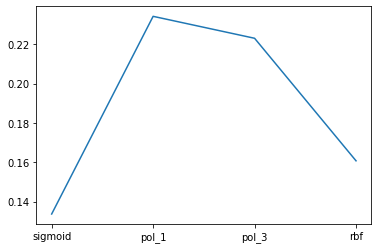

In [248]:
plt.plot(df_svm_final_norm)

## Logistic Regression:

### For simple histogram:

In [249]:
model_final = LogisticRegression(solver = 'newton-cg', random_state = 0)
model_final.fit(X_train_final, Y_train)

/home/aravind_sundarraj0112/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(random_state=0, solver='newton-cg')

In [381]:
y_log_pred_final_train = model_final.predict(X_train_final)
pd.value_counts(y_log_pred_final_train)

4    14088
6     3782
5     3281
7     2890
3     2674
1     1987
2        7
dtype: int64

In [382]:
logistic_acc_final_train = model_final.score(X_train_final, Y_train)
logistic_acc_final_train

0.31516249259813994

In [250]:
y_log_pred_final = model_final.predict(X_test_final)
pd.value_counts(y_log_pred_final)

4    3517
6     954
5     763
7     727
3     692
1     522
2       3
dtype: int64

In [251]:
logistic_acc_final = model_final.score(X_test_final, Y_test)
logistic_acc_final

0.31749791028141544

### For normalized histogram:

In [252]:
model_final_norm = LogisticRegression(solver = 'newton-cg', random_state = 0)
model_final_norm.fit(X_train_final_norm, Y_train)

LogisticRegression(random_state=0, solver='newton-cg')

In [383]:
y_log_pred_final_norm_train = model_final_norm.predict(X_train_final_norm)
pd.value_counts(y_log_pred_final_norm_train)

4    28709
dtype: int64

In [384]:
logistic_acc_final_norm_train = model_final_norm.score(X_train_final_norm, Y_train)
logistic_acc_final_norm_train

0.2513149186666202

In [253]:
y_log_pred_final_norm_train = model_final_norm.predict(X_train_final_norm)
pd.value_counts(y_log_pred_final_norm_train)

4    7178
dtype: int64

In [254]:
logistic_acc_final_norm = model_final_norm.score(X_test_final_norm, Y_test)
logistic_acc_final_norm

0.24714405126776262

## Decision tree:

### For simple histogram:

In [255]:
clf_gini_final = train_using_gini(X_train_final, X_test_final, Y_train)
clf_entropy_final = tarin_using_entropy(X_train_final, X_test_final, Y_train)

In [385]:
y_pred_gini_final_train = prediction(X_train_final, clf_gini_final)
cal_accuracy(Y_train, y_pred_gini_final_train)

Predicted values:
[4 4 4 ... 3 4 4]
Confusion Matrix:  [[   0    0  455 2634  703    0  203]
 [   0    0   47  236  123    0   30]
 [   0    0  553 2497  720    0  327]
 [   0    0  466 5810  743    0  196]
 [   0    0  446 3341  959    0  219]
 [   0    0  492 3281  855    0  202]
 [   0    0  502 1765  452    0  452]]
Accuracy :  27.078616461736736


In [386]:
y_pred_entropy_final_train = prediction(X_train_final, clf_entropy_final)
cal_accuracy(Y_train, y_pred_entropy_final_train)

Predicted values:
[5 4 4 ... 4 4 4]
Confusion Matrix:  [[   0    0  645 2104  939    0  307]
 [   0    0   84  172  147    0   33]
 [   0    0  821 1888  943    0  445]
 [   0    0  619 4670 1380    0  546]
 [   0    0  459 2623 1500    0  383]
 [   0    0  616 2591 1275    0  348]
 [   0    0  480 1166  815    0  710]]
Accuracy :  26.82434079905256


In [256]:
y_pred_gini_final = prediction(X_test_final, clf_gini_final)
cal_accuracy(Y_test, y_pred_gini_final)

Predicted values:
[4 4 4 ... 4 7 4]
Confusion Matrix:  [[   0    0   93  664  155    0   46]
 [   0    0   13   59   32    0    7]
 [   0    0  136  630  174    0   84]
 [   0    0  109 1446  179    0   40]
 [   0    0  115  850  223    0   45]
 [   0    0  110  872  221    0   44]
 [   0    0  129  472  128    0  102]]
Accuracy :  26.567288938422962


In [257]:
y_pred_entropy_final = prediction(X_test_final, clf_entropy_final)
cal_accuracy(Y_test, y_pred_entropy_final)

Predicted values:
[5 3 3 ... 3 3 4]
Confusion Matrix:  [[   0    0  150  530  208    0   70]
 [   0    0   22   50   27    0   12]
 [   0    0  182  470  260    0  112]
 [   0    0  143 1184  314    0  133]
 [   0    0  110  675  360    0   88]
 [   0    0  164  685  330    0   68]
 [   0    0  126  326  204    0  175]]
Accuracy :  26.4837001950404


### For normalized histogram:

In [258]:
clf_gini_final_norm = train_using_gini(X_train_final_norm, X_test_final_norm, Y_train)
clf_entropy_final_norm = tarin_using_entropy(X_train_final_norm, X_test_final_norm, Y_train)

In [387]:
y_pred_gini_final_norm_train = prediction(X_train_final_norm, clf_gini_final_norm)
cal_accuracy(Y_train, y_pred_gini_final_norm_train)

Predicted values:
[4 4 4 ... 4 4 4]
Confusion Matrix:  [[   6    0    5 3981    2    1    0]
 [   0    0    0  436    0    0    0]
 [   0    0   28 4060    0    9    0]
 [   0    0    3 7206    2    4    0]
 [   0    0    4 4943   17    1    0]
 [   0    0    6 4806    7   11    0]
 [   0    0    3 3163    0    5    0]]
Accuracy :  25.316102964227245


In [388]:
y_pred_entropy_final_norm_train = prediction(X_train_final_norm, clf_entropy_final_norm)
cal_accuracy(Y_train, y_pred_entropy_final_norm_train)

Predicted values:
[4 4 4 ... 4 4 4]
Confusion Matrix:  [[   6    0    2 3984    2    1    0]
 [   0    0    0  436    0    0    0]
 [   0    0   31 4066    0    0    0]
 [   0    0    4 7209    2    0    0]
 [   0    0    3 4945   17    0    0]
 [   0    0   12 4806    7    5    0]
 [   0    0    5 3166    0    0    0]]
Accuracy :  25.316102964227245


In [259]:
y_pred_gini_final_norm = prediction(X_test_final_norm, clf_gini_final_norm)
cal_accuracy(Y_test, y_pred_gini_final_norm)

Predicted values:
[3 3 3 ... 3 3 3]
Confusion Matrix:  [[301   0 493  23   0 141   0]
 [ 25   0  62   1   0  23   0]
 [288   0 573  19   0 144   0]
 [545   0 867  26   0 336   0]
 [348   0 605  36   0 244   0]
 [420   0 503  34   1 289   0]
 [231   0 517  11   0  72   0]]
Accuracy :  16.564502646976873


In [260]:
y_pred_entropy_final_norm = prediction(X_test_final_norm, clf_entropy_final_norm)
cal_accuracy(Y_test, y_pred_entropy_final_norm)

Predicted values:
[4 4 4 ... 4 4 4]
Confusion Matrix:  [[301   0  65 499   0  93   0]
 [ 25   0   6  55   0  25   0]
 [288   0  67 572   0  97   0]
 [544   0 197 871   0 162   0]
 [347   0 118 629   0 139   0]
 [420   0 143 500   1 183   0]
 [231   0  39 517   0  44   0]]
Accuracy :  19.8105321816662


## Random Forest:

### For simple histogram:

In [261]:
#Create a Gaussian Classifier
clf_final = RandomForestClassifier(n_estimators = 500)

clf_final.fit(X_train_final,Y_train)

y_pred_rf_final = clf_final.predict(X_test_final)

rf_accuracy_final = metrics.accuracy_score(Y_test, y_pred_rf_final)
print("Accuracy:", rf_accuracy_final)

Accuracy: 0.4203120646419615


### For 500 values of estimators:

Text(0, 0.5, 'Training Accuracy')

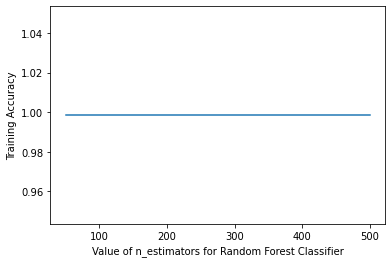

In [442]:
rf_fin_est = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_final_train =[]
for k in rf_fin_est:
    rfc_final = RandomForestClassifier(n_estimators=k)
    rfc_final.fit(X_train_final, Y_train)
    y_pred_rf_final = rfc_final.predict(X_train_final)
    accuracies_final_train.append(metrics.accuracy_score(Y_train, y_pred_rf_final))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_final_train)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Training Accuracy')

In [443]:
rf_accuracy_final_train = max(accuracies_final_train)
rf_accuracy_final_train

0.9985022118499425

Text(0, 0.5, 'Testing Accuracy')

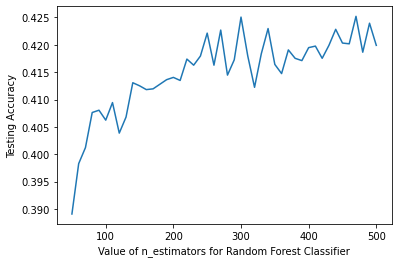

In [262]:
rf_fin_est = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_final =[]
for k in rf_fin_est:
    rfc_final = RandomForestClassifier(n_estimators=k)
    rfc_final.fit(X_train_final, Y_train)
    y_pred_rf_final = rfc_final.predict(X_test_final)
    accuracies_final.append(metrics.accuracy_score(Y_test, y_pred_rf_final))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_final)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [263]:
rf_accuracy_final = max(accuracies_final)
rf_accuracy_final

0.42518807467261077

### For normalized histogram:

In [264]:
#Create a Gaussian Classifier
clf_final_norm = RandomForestClassifier(n_estimators = 500)

clf_final_norm.fit(X_train_final_norm,Y_train)

y_pred_rf_final_norm = clf_final_norm.predict(X_test_final_norm)

rf_accuracy_final_norm = metrics.accuracy_score(Y_test, y_pred_rf_final_norm)
print("Accuracy:", rf_accuracy_final_norm)

Accuracy: 0.15533574811925327


### For 500 values of estimators:

In [65]:
rf_fin_est_norm = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_final_norm_train =[]
for k in rf_fin_est_norm:
    rfc_final_norm = RandomForestClassifier(n_estimators=k)
    rfc_final_norm.fit(X_train_final_norm, Y_train)
    y_pred_rf_final_norm = rfc_final_norm.predict(X_train_final_norm)
    accuracies_final_norm_train.append(metrics.accuracy_score(Y_train, y_pred_rf_final_norm))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_final_norm_train)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Training Accuracy')

NameError: name 'X_train_final_norm' is not defined

In [ ]:
rf_accuracy_final_norm_train = max(accuracies_final_norm_train)
rf_accuracy_final_norm_train

Text(0, 0.5, 'Testing Accuracy')

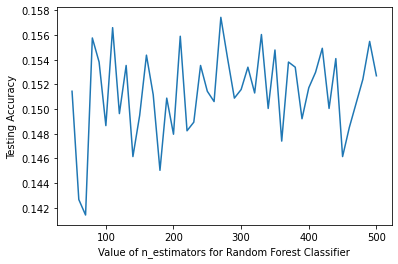

In [265]:
rf_fin_est_norm = np.linspace(start = 50, stop = 500, num = 46, dtype = int)
accuracies_final_norm =[]
for k in rf_fin_est_norm:
    rfc_final_norm = RandomForestClassifier(n_estimators=k)
    rfc_final_norm.fit(X_train_final_norm, Y_train)
    y_pred_rf_final_norm = rfc_final_norm.predict(X_test_final_norm)
    accuracies_final_norm.append(metrics.accuracy_score(Y_test, y_pred_rf_final_norm))

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.linspace(start = 50, stop = 500, num = 46, dtype = int), accuracies_final_norm)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [266]:
rf_accuracy_final_norm = max(accuracies_final_norm)
rf_accuracy_final_norm

0.1574254667038172

## DataFrame of Accuracies:

### For simple histogram:

In [ ]:
global_l_train = [knn_accuracy_global_train, accuracy_rbf_global_train, logistic_acc_global_train, rf_accuracy_global_train]
local_l_train = [knn_accuracy_local_train, accuracy_rbf_local_train, logistic_acc_local_train, rf_accuracy_local_train]
final_l_train = [knn_accuracy_final_train, accuracy_rbf_final_train, logistic_acc_final_train, rf_accuracy_final_train]

In [ ]:
accuracy_df_train = pd.DataFrame([global_l, local_l, final_l])
accuracy_df_train = accuracy_df_train.T
accuracy_df_train.columns = ["Global", "Local", "Global+Local"]
accuracy_df_train.index = ["KNN", "SVM(RBF Kernel)", "Logistic", "Random Forest"]

In [ ]:
accuracy_df_train

In [267]:
global_l = [knn_accuracy_global, accuracy_rbf_global, logistic_acc_global, rf_accuracy_global]
local_l = [knn_accuracy_local, accuracy_rbf_local, logistic_acc_local, rf_accuracy_local]
final_l = [knn_accuracy_final, accuracy_rbf_final, logistic_acc_final, rf_accuracy_final]

In [268]:
accuracy_df = pd.DataFrame([global_l, local_l, final_l])
accuracy_df = accuracy_df.T
accuracy_df.columns = ["Global", "Local", "Global+Local"]
accuracy_df.index = ["KNN", "SVM(RBF Kernel)", "Logistic", "Random Forest"]

In [269]:
accuracy_df

,Global,Local,Global+Local
KNN,0.259125,0.338813,0.335748
SVM(RBF Kernel),0.255921,0.313179,0.298690
Logistic,0.257453,0.309557,0.317498
Random Forest,0.349122,0.423656,0.425188


### For normalized histogram:

In [ ]:
global_l_norm_train = [knn_accuracy_global_norm_train, accuracy_pol_1_global_norm_train, logistic_acc_global_norm_train, rf_accuracy_global_norm_train]
local_l_norm_train = [knn_accuracy_local_norm_train, accuracy_pol_3_local_norm_train, logistic_acc_local_norm_train, rf_accuracy_local_norm_train]
final_l_norm_train = [knn_accuracy_final_norm_train, accuracy_pol_3_final_norm_train, logistic_acc_final_norm_train, rf_accuracy_final_norm_train]

In [ ]:
accuracy_df_norm_train = pd.DataFrame([global_l_norm_train, local_l_norm_train, final_l_norm_train])
accuracy_df_norm_train = accuracy_df_norm_train.T
accuracy_df_norm_train.columns = ["Global_Norm", "Local_Norm", "Global_Norm + Local_Norm"]
accuracy_df_norm_train.index = ["KNN", "SVM", "Logistic", "Random Forest"]

In [ ]:
accuracy_df_norm_train

In [270]:
global_l_norm = [knn_accuracy_global_norm, accuracy_pol_1_global_norm, logistic_acc_global_norm, rf_accuracy_global_norm]
local_l_norm = [knn_accuracy_local_norm, accuracy_pol_3_local_norm, logistic_acc_local_norm, rf_accuracy_local_norm]
final_l_norm = [knn_accuracy_final_norm, accuracy_pol_3_final_norm, logistic_acc_final_norm, rf_accuracy_final_norm]

In [271]:
accuracy_df_norm = pd.DataFrame([global_l_norm, local_l_norm, final_l_norm])
accuracy_df_norm = accuracy_df_norm.T
accuracy_df_norm.columns = ["Global_Norm", "Local_Norm", "Global_Norm + Local_Norm"]
accuracy_df_norm.index = ["KNN", "SVM", "Logistic", "Random Forest"]

In [272]:
accuracy_df_norm

,Global_Norm,Local_Norm,Global_Norm + Local_Norm
KNN,0.148509,0.148370,0.140568
SVM,0.247144,0.242129,0.223043
Logistic,0.247144,0.247144,0.247144
Random Forest,0.141126,0.155893,0.157425
